# Preprocessing iSarcasm dataset to extract useful data from survey

The purpose of this section is to preprocess the iSarcasm dataset to determine data suitable for use in the primary research survey. The goal is to extract subsets of sarcastic and non-sarcastic tweets from the d

In [1]:
#Import libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [174]:
#Read data in as CSV
df = pd.read_csv('isarcasm2022.csv')
df.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [175]:
#Drop extraneous column
df.drop("Unnamed: 0", axis=1, inplace=True)

# Emoji containing subset

In [176]:
#Create subset of tweets which already contain emojis

#Convert non-string values to string format
df["tweet"] = df["tweet"].astype(str)

#Create a regex pattern to match emojis
emoji_pattern = re.compile("[\U0001F600-\U0001F64F" #Emoticons
                           "\U0001F300-\U0001F5FF"  #Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  #Transport & map symbols
                           "\U0001F1E0-\U0001F1FF"  #Flags
                           "\U00002702-\U000027B0"  #Dingbats
                           "\U000024C2-\U0001F251"  #Enclosed characters
                           "]+", flags=re.UNICODE)

#Use the regex pattern to check if the tweet column contains emojis
df["has_emoji"] = df["tweet"].apply(lambda x: bool(re.search(emoji_pattern, x)))

#Extract the rows where the tweet column contains emojis
emoji_tweets = df[df["has_emoji"]]

#Display subset
emoji_tweets.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,True
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,True
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,True
16,My eldest is having a wild Friday night out. S...,1,My eldest is going to play bingo tonight.,1.0,1.0,0.0,0.0,0.0,0.0,True
24,@AsdaServiceTeam imagine your delivery being 2...,1,It's not acceptable for you to just refund my ...,1.0,0.0,0.0,0.0,0.0,0.0,True


In [7]:
#Check some of the tweets for emojis

#Select a random row from the DataFrame
random_row = emoji_tweets.sample(n=1)

#Retrieve the contents of the tweets column
random_tweet = random_row["tweet"].values[0]

#Print the tweet
print(random_tweet)

Hear me out... The lyrics in "coney island" should've been "lost again with no surprises, disappointments close your EYESES" 

Fixed it for you @taylorswift13 😉

#evermorealbum 
@taylornation13


In [8]:
#Check if all rows in the tweet column contain an emoji
all_rows_have_emoji = emoji_tweets["tweet"].str.contains(emoji_pattern).all()

#Display result
print(all_rows_have_emoji)

True


In [9]:
#Determine how many tweets already contain emojis
emoji_counts = df["has_emoji"].value_counts()

#Print the count
print(emoji_counts)

#I have 566 data points already containing emojis for my work

has_emoji
False    2902
True      566
Name: count, dtype: int64


In [10]:
#Determine how many tweets containing emojis are sarcastic/non-sarcastic
sarcasm_counts = emoji_tweets["sarcastic"].value_counts()

#Print the count
print(sarcasm_counts)

#164 of the emoji containing tweets are sarcastic at present

sarcastic
0    402
1    164
Name: count, dtype: int64


# No emoji subset

In [11]:
# Create a subset of rows where "has_emoji" column is False
no_emoji_tweets = df[df["has_emoji"] == False].copy()

# Print the subset DataFrame
no_emoji_tweets.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,False
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,False
5,"@jimrossignol I choose to interpret it as ""XD""...",1,It's a terrible name and the product sounds aw...,0.0,1.0,0.0,1.0,0.0,0.0,False
6,Why would Alexa's recipe for Yorkshire pudding...,1,Great recipe from Alexa,0.0,1.0,0.0,0.0,0.0,1.0,False
7,someone hit me w a horse tranquilizer istg ive...,1,Simply “I’m miserable.”,1.0,0.0,0.0,0.0,0.0,0.0,False


In [12]:
#Check some of the tweets for emojis

#Select a random row from the DataFrame
random_row = no_emoji_tweets.sample(n=1)

#Retrieve the contents of the tweets column
random_tweet = random_row["tweet"].values[0]

#Print the tweet
print(random_tweet)

When I feel like shit I like to go on wish, add a load of crap to my basket and then delete the app without buying any of it. Satisfies my need for shopping but doesn’t contribute to fast fashion.


In [13]:
#Verify no tweets in the subset contain emojis
none_of_the_rows_have_emoji = not no_emoji_tweets["tweet"].str.contains(emoji_pattern).any()

#Display the results
print(none_of_the_rows_have_emoji)

True


In [14]:
#Determine how many tweets not containing emojis are sarcastic/non-sarcastic
sarcasm_counts = no_emoji_tweets["sarcastic"].value_counts()

#Print the count
print(sarcasm_counts)

sarcastic
0    2199
1     703
Name: count, dtype: int64


In [15]:
#Create the subsets for the survey

#Create sarcastic/ non-sarcastic tweets subsets
sarc = df[df["sarcastic"] == 1].copy()
nonsarc = df[df["sarcastic"] == 0].copy()

#Check content
sarc.shape, nonsarc.shape

((867, 10), (2601, 10))

In [16]:
#Create subsets containing tweets w/o emojis for both
sarc_noemo = sarc[~sarc["tweet"].str.contains(emoji_pattern)].copy()
nonsarc_noemo = nonsarc[~nonsarc["tweet"].str.contains(emoji_pattern)].copy()

#Check content
sarc_noemo.shape, nonsarc_noemo.shape

((703, 10), (2199, 10))

In [17]:
#Not all of the non-sarcatic tweets without emojis will be used for the survey- randomly select the necessary amount

#Randomly sample 465 rows
nonsarc_noemo_ss = nonsarc_noemo.sample(n=465, random_state=42)

#Check content
nonsarc_noemo_ss.shape

(465, 10)

In [18]:
#Export to CSV to input into survey
nonsarc_noemo.to_csv('nonsarc_noemoji_surveyqs.csv', index=False)

In [19]:
#Repeat for sarcastic emojis
sarc_noemo.to_csv('sarc_noemoji_surveyqs.csv', index=False)

# Processing results

In [20]:
#Importing isarcasm dataset
df_isarcasm = pd.read_csv('isarcasm2022.csv')
df_isarcasm.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Importing survey results
df_survey = pd.read_excel('survey_results_data.xlsx')
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t..."
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢


# Stats for survey results

In [22]:
#How many responses 
df_survey['participant_no'].nunique()

87

In [23]:
#All over 18?
df_survey['over_18'].nunique()

1

In [24]:
#All emoji users?
df_survey['use_emojis'].nunique()

1

In [25]:
#Gender response breakdown

#Remove all but one response from each participant
df_unique_participants = df_survey.drop_duplicates(subset='participant_no')

#Check responses by gender
df_unique_participants['gender'].value_counts()

gender
Female                 49
Male                   35
I don't want to say     1
Other                   1
Queer                   1
Name: count, dtype: int64

In [26]:
#Age response breakdown
print('Overall age breakdown:')
print(df_unique_participants['age'].value_counts())

#Break down by gender
male_subset = df_unique_participants[df_unique_participants['gender'] == 'Male']
print('Breakdown for male respondents:')
print(male_subset['age'].value_counts())
    
female_subset = df_unique_participants[df_unique_participants['gender'] == 'Female']
print('Breakdown for female respondents:')
print(female_subset['age'].value_counts())

Overall age breakdown:
age
25-34    29
18-24    27
35-44    24
45-64     7
Name: count, dtype: int64
Breakdown for male respondents:
age
18-24    11
35-44    11
25-34     8
45-64     5
Name: count, dtype: int64
Breakdown for female respondents:
age
25-34    19
18-24    15
35-44    13
45-64     2
Name: count, dtype: int64


<Figure size 1440x1440 with 0 Axes>

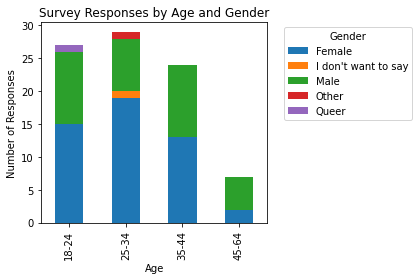

In [27]:
#Create a plot which conveys the information above for the report

#Group data by age and gender
grouped = df_unique_participants.groupby(['age', 'gender']).size().unstack()

#Increase the figure size
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

#Create plot
ax = grouped.plot(kind='bar', stacked=True)
plt.title("Survey Responses by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Number of Responses")

#Move the legend outside the plot and adjust its position
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

#Adjust spacing for labels
plt.tight_layout() 

#Display the plot
plt.show()

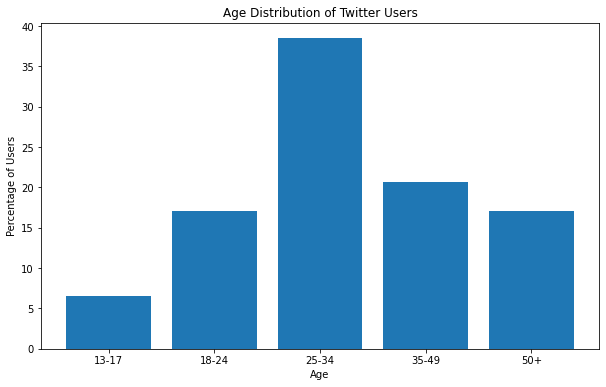

In [28]:
#Create a similar plot using twitter demographic stats for the report

#Age groups and their corresponding percentages
age_groups = ['13-17', '18-24', '25-34', '35-49', '50+']
percentages = [6.6, 17.1, 38.5, 20.7, 17.1]

#Increase the figure size
plt.figure(figsize=(10, 6))

#Create the bar plot
plt.bar(age_groups, percentages)

#Adding labels and title
plt.title("Age Distribution of Twitter Users")
plt.xlabel("Age")
plt.ylabel("Percentage of Users")

#Display the percentages on top of the bars
#for i, percentage in enumerate(percentages):
#    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha='center')

#Display the plot
plt.show()

In [29]:
#Check distribution of classifications
df_survey['class_survey'].value_counts()

class_survey
It is not sarcastic    359
It is sarcastic        345
I don't know           128
Name: count, dtype: int64

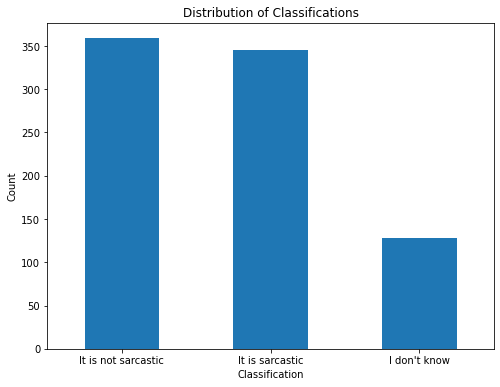

In [30]:
#Make a similar plot for classification distributions

#Save distribution information into a variable
class_counts = df_survey['class_survey'].value_counts()

#Increase the figure size
plt.figure(figsize=(8, 6))

#Create the bar plot
class_counts.plot(kind='bar')

#Adding labels and title
plt.title("Distribution of Classifications")
plt.xlabel("Classification")
plt.ylabel("Count")

#Display the counts on top of the bars
#for i, count in enumerate(class_counts):
#    plt.text(i, count + 10, str(count), ha='center')

#Ajust rotation until it looks good
plt.xticks(rotation=0)  

#Show the plot
plt.show()

In [26]:
#Break this down by gender

#Remake the gender subsets to include all responses
male_subset = df_survey[df_survey['gender'] == 'Male']
female_subset = df_survey[df_survey['gender'] == 'Female']

print('Male response breakdown:')
print(male_subset['class_survey'].value_counts())

print('Female response breakdown:')
print(female_subset['class_survey'].value_counts())

Male response breakdown:
class_survey
It is sarcastic        141
It is not sarcastic    135
I don't know            58
Name: count, dtype: int64
Female response breakdown:
class_survey
It is not sarcastic    209
It is sarcastic        196
I don't know            63
Name: count, dtype: int64


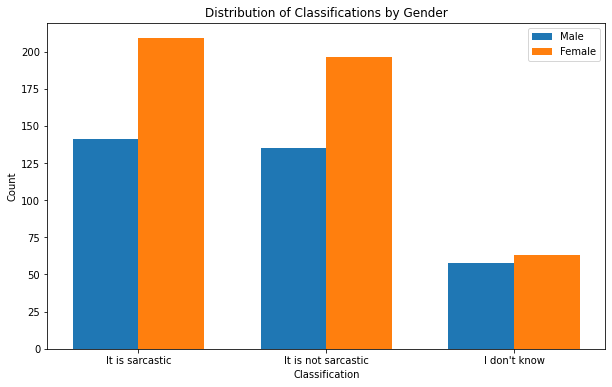

In [48]:
#Break down classifications by gender

#Separate data by gender
male_subset = df_survey[df_survey['gender'] == 'Male']
female_subset = df_survey[df_survey['gender'] == 'Female']

#Get value counts of classifications for each gender
male_class_counts = male_subset['class_survey'].value_counts()
female_class_counts = female_subset['class_survey'].value_counts()

#Increase the figure size
plt.figure(figsize=(10, 6))

#Create paired bar plot
width = 0.35  #Width of the bars
x = range(len(male_class_counts))

plt.bar(x, male_class_counts, width, label='Male')
plt.bar([i + width for i in x], female_class_counts, width, label='Female')

#Adding labels and title
plt.title("Distribution of Classifications by Gender")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks([i + width / 2 for i in x], male_class_counts.index, rotation=0)
plt.legend()

#Show the plot
plt.show()

In [27]:
#Break this down by ages
a_subset = df_survey[df_survey['age'] == '18-24']
b_subset = df_survey[df_survey['age'] == '25-34']
c_subset = df_survey[df_survey['age'] == '35-44']
d_subset = df_survey[df_survey['age'] == '45-64']

print('18-24 age group response breakdown:')
print(a_subset['class_survey'].value_counts())

print('25-34 age group response breakdown:')
print(b_subset['class_survey'].value_counts())

print('35-44 age group response breakdown:')
print(c_subset['class_survey'].value_counts())

print('45-64 age group response breakdown:')
print(d_subset['class_survey'].value_counts())

18-24 age group response breakdown:
class_survey
It is not sarcastic    114
It is sarcastic        111
I don't know            35
Name: count, dtype: int64
25-34 age group response breakdown:
class_survey
It is not sarcastic    130
It is sarcastic        114
I don't know            50
Name: count, dtype: int64
35-44 age group response breakdown:
class_survey
It is sarcastic        95
It is not sarcastic    83
I don't know           35
Name: count, dtype: int64
45-64 age group response breakdown:
class_survey
It is not sarcastic    32
It is sarcastic        25
I don't know            8
Name: count, dtype: int64


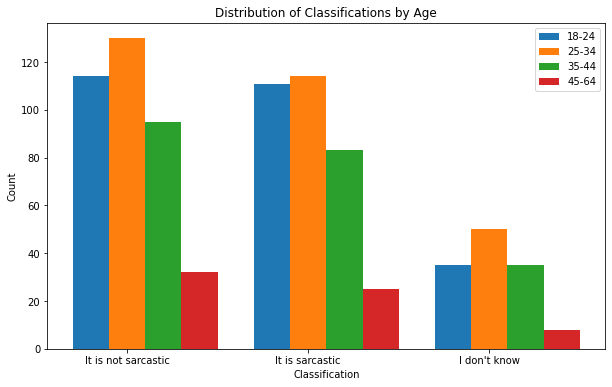

In [50]:
#Break down classifications by age

#Separate data by age
age_bins = ['18-24', '25-34', '35-44', '45-64']
age_subsets = [df_survey[df_survey['age'] == age] for age in age_bins]

#Get value counts of classifications for each age bin
age_subset_counts = [subset['class_survey'].value_counts() for subset in age_subsets]

# Increase the figure size
plt.figure(figsize=(10, 6))

# Create paired bar plot
width = 0.2  # Width of the bars
x = range(len(age_subset_counts[0]))

for i, subset_counts in enumerate(age_subset_counts):
    plt.bar([pos + width * i for pos in x], subset_counts, width, label=age_bins[i])

# Adding labels and title
plt.title("Distribution of Classifications by Age")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks([pos + width for pos in x], subset_counts.index, rotation=0)
plt.legend()

# Show the plot
plt.show()


# Response Quality Evaluation

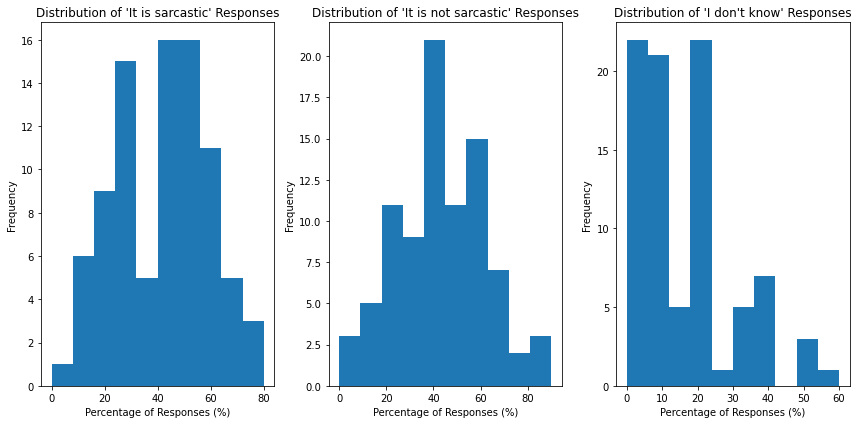

In [31]:
# Calculate the percentage of each classification for each participant
participant_percentages = []
class_labels = ["It is sarcastic", "It is not sarcastic", "I don't know"]

for participant in df_survey['participant_no'].unique():
    subset = df_survey[df_survey['participant_no'] == participant]
    total_responses = len(subset)
    
    percentages = []
    for class_label in class_labels:
        class_count = (subset['class_survey'] == class_label).sum()
        class_percentage = (class_count / total_responses) * 100
        percentages.append(class_percentage)
    
    participant_percentages.append(percentages)

# Convert the list of lists to a DataFrame
percentage_df = pd.DataFrame(participant_percentages, columns=class_labels)

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create distribution plots for each classification
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)
    plt.hist(percentage_df[class_label], bins=10)
    plt.title(f"Distribution of '{class_label}' Responses")
    plt.xlabel("Percentage of Responses (%)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

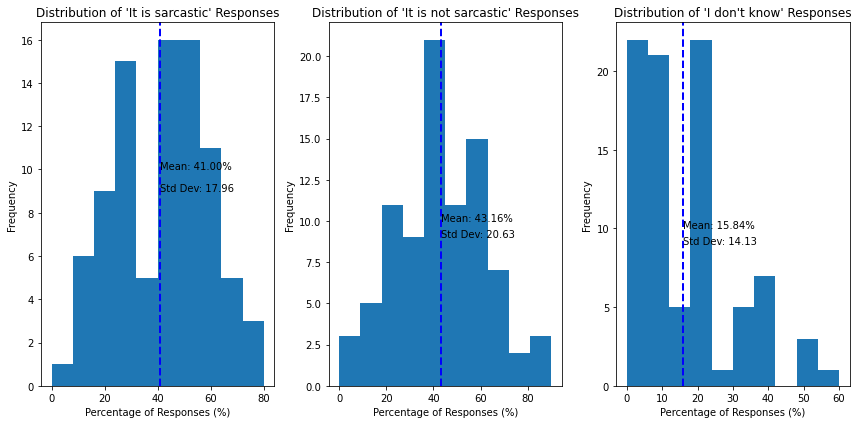

In [32]:
# Calculate the percentage of each classification for each participant
participant_percentages = []
class_labels = ["It is sarcastic", "It is not sarcastic", "I don't know"]

for participant in df_survey['participant_no'].unique():
    subset = df_survey[df_survey['participant_no'] == participant]
    total_responses = len(subset)
    
    percentages = []
    for class_label in class_labels:
        class_count = (subset['class_survey'] == class_label).sum()
        class_percentage = (class_count / total_responses) * 100
        percentages.append(class_percentage)
    
    participant_percentages.append(percentages)

# Convert the list of lists to a DataFrame
percentage_df = pd.DataFrame(participant_percentages, columns=class_labels)

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create distribution plots for each classification
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)
    plt.hist(percentage_df[class_label], bins=10)
    plt.axvline(x=percentage_df[class_label].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.title(f"Distribution of '{class_label}' Responses")
    plt.xlabel("Percentage of Responses (%)")
    plt.ylabel("Frequency")
    
    mean = percentage_df[class_label].mean()
    std_dev = percentage_df[class_label].std()
    
    plt.text(percentage_df[class_label].mean(), 10, f"Mean: {percentage_df[class_label].mean():.2f}%", color='black', fontsize=10, ha='left')
    plt.text(mean, 9, f"Std Dev: {std_dev:.2f}", color='black', fontsize=10, ha='left')

plt.tight_layout()
plt.show()

In [33]:
#Search for columns that contain the first QC question
phrase = 'caffeine addiction'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head(10)

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...
10,2,Yes,Yes,Male,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college is a caffein...
20,3,Yes,Yes,I don't want to say,25-34,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
30,4,Yes,Yes,Female,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
40,5,Yes,Yes,Female,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
50,6,Yes,Yes,Male,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
143,15,Yes,Yes,Female,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...


In [34]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic    7
Name: count, dtype: int64

In [35]:
#Print the responses
print('Response 1:')
print(qc['edited_text'].iloc[0])
print('Age:')
print(qc['age'].iloc[0])
print('Gender:')
print(qc['gender'].iloc[0])
print('')
print('Response 2:')
print(qc['edited_text'].iloc[1])
print('Age:')
print(qc['age'].iloc[1])
print('Gender:')
print(qc['gender'].iloc[1])
print('')
print('Response 3:')
print(qc['edited_text'].iloc[2])
print('Age:')
print(qc['age'].iloc[2])
print('Gender:')
print(qc['gender'].iloc[2])
print('')
print('Response 4:')
print(qc['edited_text'].iloc[3])
print('Age:')
print(qc['age'].iloc[3])
print('Gender:')
print(qc['gender'].iloc[3])
print('')
print('Response 5:')
print(qc['edited_text'].iloc[4])
print('Age:')
print(qc['age'].iloc[4])
print('Gender:')
print(qc['gender'].iloc[4])
print('')
print('Response 6:')
print(qc['edited_text'].iloc[5])
print('Age:')
print(qc['age'].iloc[5])
print('Gender:')
print(qc['gender'].iloc[5])
print('')
print('Response 7:')
print(qc['edited_text'].iloc[6])
print('Age:')
print(qc['age'].iloc[6])
print('Gender:')
print(qc['gender'].iloc[6])

Response 1:
The only thing I got from college was a caffeine addiction 😏
Age:
18-24
Gender:
Female

Response 2:
The only thing I got from college is a caffeine addiction 😭
Age:
18-24
Gender:
Male

Response 3:
The only thing I got from college is a caffeine addiction 😂
Age:
25-34
Gender:
I don't want to say

Response 4:
The only thing I got from college is a caffeine addiction 🤠
Age:
18-24
Gender:
Female

Response 5:
The only thing I got from college is a caffeine addiction😭
Age:
18-24
Gender:
Female

Response 6:
The only thing I got from college is a caffeine addiction 😵‍💫😭😞🫠
Age:
18-24
Gender:
Male

Response 7:
The only thing I got from college is a caffeine addiction 😂
Age:
18-24
Gender:
Female


In [36]:
#Search for columns that contain the first QC question
phrase = 'business casual attire'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
555,59,Yes,Yes,Female,25-34,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
754,80,Yes,Yes,Female,35-44,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
764,81,Yes,Yes,Female,35-44,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
774,82,Yes,Yes,Female,25-34,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
784,83,Yes,Yes,Female,45-64,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...


In [37]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic    7
Name: count, dtype: int64

In [38]:
#Print the responses
print('Response 1:')
print(qc['edited_text'].iloc[0])
print('Age:')
print(qc['age'].iloc[0])
print('Gender:')
print(qc['gender'].iloc[0])
print('')
print('Response 2:')
print(qc['edited_text'].iloc[1])
print('Age:')
print(qc['age'].iloc[1])
print('Gender:')
print(qc['gender'].iloc[1])
print('')
print('Response 3:')
print(qc['edited_text'].iloc[2])
print('Age:')
print(qc['age'].iloc[2])
print('Gender:')
print(qc['gender'].iloc[2])
print('')
print('Response 4:')
print(qc['edited_text'].iloc[3])
print('Age:')
print(qc['age'].iloc[3])
print('Gender:')
print(qc['gender'].iloc[3])
print('')
print('Response 5:')
print(qc['edited_text'].iloc[4])
print('Age:')
print(qc['age'].iloc[4])
print('Gender:')
print(qc['gender'].iloc[4])
print('')
print('Response 6:')
print(qc['edited_text'].iloc[5])
print('Age:')
print(qc['age'].iloc[5])
print('Gender:')
print(qc['gender'].iloc[5])
print('')
print('Response 7:')
print(qc['edited_text'].iloc[6])
print('Age:')
print(qc['age'].iloc[6])
print('Gender:')
print(qc['gender'].iloc[6])

Response 1:
was not aware that Crocs were appropriate business casual attire.
Age:
25-34
Gender:
Female

Response 2:
was not aware that Crocs were appropriate business casual attire. 😒
Age:
35-44
Gender:
Female

Response 3:
was not aware that Crocs were appropriate business casual attire. 😅
Age:
35-44
Gender:
Female

Response 4:
was not aware that Crocs were appropriate business casual attire.😂
Age:
25-34
Gender:
Female

Response 5:
was not aware that Crocs were appropriate business casual attire. 🙄
Age:
45-64
Gender:
Female

Response 6:
was not aware that Crocs were appropriate business casual attire. 🙄
Age:
25-34
Gender:
Female

Response 7:
was not aware that Crocs were appropriate business casual attire.🤔
Age:
25-34
Gender:
Female


In [39]:
#Search for columns that contain the first QC question
phrase = 'villains in super hero films'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
60,7,Yes,Yes,Female,35-44,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...
71,8,Yes,Yes,Female,25-34,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...
81,9,Yes,Yes,Female,25-34,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...
91,10,Yes,Yes,Other,25-34,The villains in super hero films are awfully p...,It is not sarcastic,The villains in super hero films are awfully p...
101,11,Yes,Yes,Female,25-34,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...


In [40]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic        16
It is not sarcastic     2
I don't know            1
Name: count, dtype: int64

In [41]:
#Print the sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is sarcastic']

print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])
print('')
print('Response 3:')
print(subset_qc['edited_text'].iloc[2])
print('Age:')
print(subset_qc['age'].iloc[2])
print('Gender:')
print(subset_qc['gender'].iloc[2])
print('')
print('Response 4:')
print(subset_qc['edited_text'].iloc[3])
print('Age:')
print(subset_qc['age'].iloc[3])
print('Gender:')
print(subset_qc['gender'].iloc[3])
print('')
print('Response 5:')
print(subset_qc['edited_text'].iloc[4])
print('Age:')
print(subset_qc['age'].iloc[4])
print('Gender:')
print(subset_qc['gender'].iloc[4])
print('')
print('Response 6:')
print(subset_qc['edited_text'].iloc[5])
print('Age:')
print(subset_qc['age'].iloc[5])
print('Gender:')
print(subset_qc['gender'].iloc[5])
print('')
print('Response 7:')
print(subset_qc['edited_text'].iloc[6])
print('Age:')
print(subset_qc['age'].iloc[6])
print('Gender:')
print(subset_qc['gender'].iloc[6])
print('Response 8:')
print(subset_qc['edited_text'].iloc[7])
print('Age:')
print(subset_qc['age'].iloc[7])
print('Gender:')
print(subset_qc['gender'].iloc[7])
print('')
print('Response 9:')
print(subset_qc['edited_text'].iloc[8])
print('Age:')
print(subset_qc['age'].iloc[8])
print('Gender:')
print(subset_qc['gender'].iloc[8])
print('')
print('Response 10:')
print(subset_qc['edited_text'].iloc[9])
print('Age:')
print(subset_qc['age'].iloc[9])
print('Gender:')
print(subset_qc['gender'].iloc[9])
print('')
print('Response 11:')
print(subset_qc['edited_text'].iloc[10])
print('Age:')
print(subset_qc['age'].iloc[10])
print('Gender:')
print(subset_qc['gender'].iloc[10])
print('')
print('Response 12:')
print(subset_qc['edited_text'].iloc[11])
print('Age:')
print(subset_qc['age'].iloc[11])
print('Gender:')
print(subset_qc['gender'].iloc[11])
print('')
print('Response 13:')
print(subset_qc['edited_text'].iloc[12])
print('Age:')
print(subset_qc['age'].iloc[12])
print('Gender:')
print(subset_qc['gender'].iloc[12])
print('')
print('Response 14:')
print(subset_qc['edited_text'].iloc[13])
print('Age:')
print(subset_qc['age'].iloc[13])
print('Gender:')
print(subset_qc['gender'].iloc[13])
print('Response 15:')
print(subset_qc['edited_text'].iloc[14])
print('Age:')
print(subset_qc['age'].iloc[14])
print('Gender:')
print(subset_qc['gender'].iloc[14])
print('')
print('Response 16:')
print(subset_qc['edited_text'].iloc[15])
print('Age:')
print(subset_qc['age'].iloc[15])
print('Gender:')
print(subset_qc['gender'].iloc[15])

Response 1:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city
Age:
35-44
Gender:
Female

Response 2:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😌
Age:
25-34
Gender:
Female

Response 3:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😉
Age:
25-34
Gender:
Female

Response 4:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😂
Age:
25-34
Gender:
Female

Response 5:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city💀
Age:
35-44
Gender:
Male

Response 6:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😉
Age:
25-34
Gender:
Female

Response 7:
The

In [42]:
#Print the non sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is not sarcastic']

print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

Response 1:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 🤔
Age:
25-34
Gender:
Other

Response 2:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city😡
Age:
25-34
Gender:
Female


In [43]:
#Print the unknown responses
subset_qc = qc[qc['class_survey'] == "I don't know"]

print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')

Response 1:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city
Age:
18-24
Gender:
Female



In [44]:
#Search for columns that contain the first QC question
phrase = 'season 4 of trump does america'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
410,44,Yes,Yes,Male,18-24,Loving season 4 of trump does America. Funnies...,It is sarcastic,Loving season 4 of trump does America. Funnies...
420,45,Yes,Yes,Male,35-44,Loving season 4 of trump does America. Funnies...,It is not sarcastic,Loving season 4 of trump does America. 😜Funnie...
430,46,Yes,Yes,Male,45-64,Loving season 4 of trump does America. Funnies...,It is sarcastic,Loving season 4 of trump does America. Funnies...
440,47,Yes,Yes,Male,25-34,Loving season 4 of trump does America. Funnies...,I don't know,Loving season 4 of trump does America. Funnies...
442,48,Yes,Yes,Female,25-34,Loving season 4 of trump does America. Funnies...,I don't know,Loving season 4 of trump does America. Funnies...


In [45]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic        2
It is not sarcastic    2
I don't know           2
Name: count, dtype: int64

In [46]:
#Print the sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is sarcastic']
print('Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

#Print non sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is not sarcastic']
print('Non-Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

#Print unknown sarcastic responses
subset_qc = qc[qc['class_survey'] == "I don't know"]
print('Unknown Classification Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

Sarcastic Responses:
Response 1:
Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020 🤡🤡
Age:
18-24
Gender:
Male

Response 2:
Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020 😉
Age:
45-64
Gender:
Male
Non-Sarcastic Responses:
Response 1:
Loving season 4 of trump does America. 😜Funniest season yet 😂 #DonaldTrump #Trump #MAGA #MAGA2020
Age:
35-44
Gender:
Male

Response 2:
Loving season 4 of trump does America. Funniest season yet 🤣🙏🇺🇸🇺🇸🇺🇸#DonaldTrump #Trump #MAGA #MAGA2020
Age:
18-24
Gender:
Female
Unknown Classification Responses:
Response 1:
Loving season 4 of trump does America. Funniest season yet 🤣 #DonaldTrump #Trump #MAGA #MAGA2020
Age:
25-34
Gender:
Male

Response 2:
Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020
Age:
25-34
Gender:
Female


In [47]:
#Search for columns that contain the first QC question
phrase = 'thank you, science'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
255,27,Yes,Yes,Male,25-34,"Vaccine dose 1. Thank you, science.",I don't know,"Vaccine dose 1. Thank you, science."
283,30,Yes,Yes,Male,18-24,"Vaccine dose 1. Thank you, science.",It is not sarcastic,"Vaccine dose 1. Thank you, science.👍"
311,33,Yes,Yes,Female,35-44,"Vaccine dose 1. Thank you, science.",It is sarcastic,"Vaccine dose 1. Thank you, science. 💀"
339,36,Yes,Yes,Female,25-34,"Vaccine dose 1. Thank you, science.",It is sarcastic,"Vaccine dose 1. Thank you, science. 😜"
367,39,Yes,Yes,Male,18-24,"Vaccine dose 1. Thank you, science.",It is not sarcastic,"Vaccine dose 1. Thank you, science.👍"


In [48]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is not sarcastic    3
It is sarcastic        2
I don't know           1
Name: count, dtype: int64

In [49]:
#Print the sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is sarcastic']
print('Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

#Print non sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is not sarcastic']
print('Non-Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])
print('Response 3:')
print(subset_qc['edited_text'].iloc[2])
print('Age:')
print(subset_qc['age'].iloc[2])
print('Gender:')
print(subset_qc['gender'].iloc[2])

#Print unknown sarcastic responses
subset_qc = qc[qc['class_survey'] == "I don't know"]
print('Unknown Classification Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])

Sarcastic Responses:
Response 1:
Vaccine dose 1. Thank you, science. 💀
Age:
35-44
Gender:
Female

Response 2:
Vaccine dose 1. Thank you, science. 😜
Age:
25-34
Gender:
Female
Non-Sarcastic Responses:
Response 1:
Vaccine dose 1. Thank you, science.👍
Age:
18-24
Gender:
Male

Response 2:
Vaccine dose 1. Thank you, science.👍
Age:
18-24
Gender:
Male
Response 3:
Vaccine dose 1. Thank you, science. 💛
Age:
18-24
Gender:
Male
Unknown Classification Responses:
Response 1:
Vaccine dose 1. Thank you, science.
Age:
25-34
Gender:
Male


# Emoji use frequency

In [50]:
#Importing libraries
import emoji
from statistics import mean
import demoji
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy import stats
import random

In [51]:
#Make a subsets based on classifications
sarc = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarc = df_survey[df_survey['class_survey'] == 'It is not sarcastic']
idk = df_survey[df_survey['class_survey'] == "I don't know"]

In [109]:
#Use the same sentiment polarity model as before
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

#Create the sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
#Function to calculate probabilities
def calculate_probabilities(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).squeeze().tolist()
    return probabilities  

#Apply function
df_survey['sentiment_result'] = df_survey['edited_text'].apply(calculate_probabilities)
df_survey.head()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,sentiment_result
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[0.1715908795595169, 0.5636150240898132, 0.264..."
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,"[0.2505592703819275, 0.6752334833145142, 0.074..."
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[0.21971991658210754, 0.37854474782943726, 0.4..."
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[0.0015152746345847845, 0.00982738845050335, 0..."
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[0.9546178579330444, 0.039340902119874954, 0.0..."


In [110]:
#Use results to determine the overall polarity of the text in each case

#Function to determine sentiment label based on probabilities
def determine_sentiment(probabilities):
    if probabilities[2] > probabilities[0]:
        return 'positive'
    else:
        return 'negative'

#Apply the function
df_survey['sentiment_label'] = df_survey['sentiment_result'].apply(determine_sentiment)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,sentiment_result,sentiment_label
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[0.1715908795595169, 0.5636150240898132, 0.264...",positive
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,"[0.2505592703819275, 0.6752334833145142, 0.074...",negative
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[0.21971991658210754, 0.37854474782943726, 0.4...",positive
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[0.0015152746345847845, 0.00982738845050335, 0...",positive
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[0.9546178579330444, 0.039340902119874954, 0.0...",negative


In [111]:
#Make secondary subsets for classifications by polarity positive/negative 
sarc_pos = df_survey[(df_survey['class_survey'] == 'It is sarcastic') & (df_survey['sentiment_label'] == 'positive')]
sarc_neg = df_survey[(df_survey['class_survey'] == 'It is sarcastic') & (df_survey['sentiment_label'] == 'negative')]
nonsarc_pos = df_survey[(df_survey['class_survey'] == 'It is not sarcastic') & (df_survey['sentiment_label'] == 'positive')]
nonsarc_neg = df_survey[(df_survey['class_survey'] == 'It is not sarcastic') & (df_survey['sentiment_label'] == 'negative')]

In [76]:
#Determine the average number of emojis used in a sarcastic tweet

#Make a list to hold number of emojis per tweet after editing
emojis_per_string = []

#Determin the number of emojis per tweet
for text in sarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)

#Average over the df
average_emojis_per_string = mean(emojis_per_string)

#Print result
print("Average emojis per string:", average_emojis_per_string)

Average emojis per string: 0.9797101449275363


In [77]:
#Determine the average number of emojis used in a non sarcastic tweet

#Make a list to hold number of emojis per tweet after editing
emojis_per_string = []

#Determin the number of emojis per tweet
for text in nonsarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)

#Average over the df
average_emojis_per_string = mean(emojis_per_string)

#Print result
print("Average emojis per string:", average_emojis_per_string)

Average emojis per string: 0.6072423398328691


In [78]:
#Determine the average number of emojis used in a tweet of unknown classification

#Make a list to hold number of emojis per tweet after editing
emojis_per_string = []

#Determin the number of emojis per tweet
for text in idk['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)

#Average over the df
average_emojis_per_string = mean(emojis_per_string)

#Print result
print("Average emojis per string:", average_emojis_per_string)

Average emojis per string: 0.296875


In [79]:
#Determine if there is statistical significance between the means

#First determine if parametric/non-parametric tests are suitable

#Check if the average emojis is normally distributed using the shapiro wilk test

#Make a list to hold number of emojis per tweet after editing
sarc_emojis_per_string = []

#Determin the number of emojis per tweet
for text in sarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    sarc_emojis_per_string.append(emoji_count)

#Perform shapiro wilk test
statistic, p_value = shapiro(sarc_emojis_per_string)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [80]:
#Repeat for nonsarcastic tweets
#Make a list to hold number of emojis per tweet after editing
nonsarc_emojis_per_string = []

#Determin the number of emojis per tweet
for text in nonsarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    nonsarc_emojis_per_string.append(emoji_count)

#Perform shapiro wilk test
statistic, p_value = shapiro(nonsarc_emojis_per_string)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [81]:
#Get the length of each list
print(len(sarc_emojis_per_string), len(nonsarc_emojis_per_string))

345 359


In [82]:
#Reduce the length of nonsarc to even out the data
nonsarc_emojis_per_string = random.sample(nonsarc_emojis_per_string, 345)
len(nonsarc_emojis_per_string)

345

In [83]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarc_emojis_per_string, nonsarc_emojis_per_string)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference between the number of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference between the number of emojis in the string (reject null hypothesis)")

There's a significant difference between the number of emojis in the string (reject null hypothesis)


In [112]:
#Repeat for positive and negative subsets

#Average sarc pos
emojis_per_string = []
for text in sarc_pos['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)
average_emojis_per_string = mean(emojis_per_string)
print("Average emojis per string sarc_pos:", average_emojis_per_string)

#Average nonsarc pos
emojis_per_string = []
for text in nonsarc_pos['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)
average_emojis_per_string = mean(emojis_per_string)
print("Average emojis per string nonsarc_pos:", average_emojis_per_string)

#Average sarc neg
emojis_per_string = []
for text in sarc_neg['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)
average_emojis_per_string = mean(emojis_per_string)
print("Average emojis per string sarc_neg:", average_emojis_per_string)

#Average nonsarc neg
emojis_per_string = []
for text in nonsarc_neg['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)
average_emojis_per_string = mean(emojis_per_string)
print("Average emojis per string nonsarc_neg:", average_emojis_per_string)

Average emojis per string sarc_pos: 0.9785714285714285
Average emojis per string nonsarc_pos: 0.6024096385542169
Average emojis per string sarc_neg: 0.9804878048780488
Average emojis per string nonsarc_neg: 0.6113989637305699


In [117]:
#Positive
sarc_emojis_per_string = []
for text in sarc_pos['edited_text']:
    emoji_count = len(demoji.findall(text))
    sarc_emojis_per_string.append(emoji_count)
nonsarc_emojis_per_string = []
for text in nonsarc_pos['edited_text']:
    emoji_count = len(demoji.findall(text))
    nonsarc_emojis_per_string.append(emoji_count)
    
#Get the length of each list
print(len(sarc_emojis_per_string), len(nonsarc_emojis_per_string))

140 166


In [118]:
#Perform Wilcoxon signed-rank test
nonsarc_emojis_per_string = random.sample(nonsarc_emojis_per_string, 140)
statistic, p_value = wilcoxon(sarc_emojis_per_string, nonsarc_emojis_per_string)
#Check the p-value to determine if there's a significant difference
alpha = 0.05  #significance level
if p_value > alpha:
    print("There's no significant difference between the number of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference between the number of emojis in the string (reject null hypothesis)")

There's a significant difference between the number of emojis in the string (reject null hypothesis)


In [119]:
#Negative
sarc_emojis_per_string = []
for text in sarc_neg['edited_text']:
    emoji_count = len(demoji.findall(text))
    sarc_emojis_per_string.append(emoji_count)
nonsarc_emojis_per_string = []
for text in nonsarc_neg['edited_text']:
    emoji_count = len(demoji.findall(text))
    nonsarc_emojis_per_string.append(emoji_count)
    
#Get the length of each list
print(len(sarc_emojis_per_string), len(nonsarc_emojis_per_string))

205 193


In [120]:
#Perform Wilcoxon signed-rank test
sarc_emojis_per_string = random.sample(sarc_emojis_per_string, 193)
statistic, p_value = wilcoxon(sarc_emojis_per_string, nonsarc_emojis_per_string)
#Check the p-value to determine if there's a significant difference
alpha = 0.05  #significance level
if p_value > alpha:
    print("There's no significant difference between the number of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference between the number of emojis in the string (reject null hypothesis)")

There's a significant difference between the number of emojis in the string (reject null hypothesis)


# Emoji position in text

In [84]:
#Determine the average position of an emoji in a sarcastic tweet

sarc_emoji_positions = []

for text in sarc['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  # Normalize position to a range between 0 and 1
        sarc_emoji_positions.append(emoji_position)
    else:
        sarc_emoji_positions.append(1.0) 

average_emoji_position = mean(sarc_emoji_positions)

print("Average position of emoji:", average_emoji_position)

Average position of emoji: 0.9471121829021524


In [85]:
#Determine the average position of an emoji in a non sarcastic tweet

nonsarc_emoji_positions = []

for text in nonsarc['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  # Normalize position to a range between 0 and 1
        nonsarc_emoji_positions.append(emoji_position)
    else:
        nonsarc_emoji_positions.append(1.0) 

average_emoji_position = mean(nonsarc_emoji_positions)

print("Average position of emoji:", average_emoji_position)

Average position of emoji: 0.9727395583043412


In [86]:
#Determine the average position of an emoji in a tweet of unknown classification

emoji_positions = []

for text in idk['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  # Normalize position to a range between 0 and 1
        emoji_positions.append(emoji_position)
    else:
        emoji_positions.append(1.0)

average_emoji_position = mean(emoji_positions)

print("Average position of emoji:", average_emoji_position)

Average position of emoji: 0.9758845579170218


In [87]:
#Doesnt look like there is good evidence that emojis are placed in different locations here

#Use tests to check for statistical significance between means

#Determine if parametric/nonparametric test is appropriate first

#Check if data is normally distributed

#Perform shapiro wilk test
statistic, p_value = shapiro(sarc_emoji_positions)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [88]:
#Repeat for nonsarcastic tweets

#Perform shapiro wilk test
statistic, p_value = shapiro(nonsarc_emoji_positions)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [89]:
#Non parametric test is appropriate

#Get the length of each list
print(len(sarc_emoji_positions), len(nonsarc_emoji_positions))

345 359


In [90]:
#Reduce the length of nonsarc to even out the data
nonsarc_emoji_positions = random.sample(nonsarc_emoji_positions, 345)
len(nonsarc_emoji_positions)

345

In [91]:
#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarc_emoji_positions, nonsarc_emoji_positions)

#Check the p-value to determine if there's a significant difference
alpha = 0.05  #significance level
if p_value > alpha:
    print("There's no significant difference in the location of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference in the location of emojis in the string (reject null hypothesis)")

There's a significant difference in the location of emojis in the string (reject null hypothesis)


In [121]:
#Determine the average position of an emoji in a sarcastic tweet positive/negative subsets

sarc_emoji_positions = []
for text in sarc_pos['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text) 
        sarc_emoji_positions.append(emoji_position)
    else:
        sarc_emoji_positions.append(1.0) 
average_emoji_position = mean(sarc_emoji_positions)
print("Average position of emoji (sarc_pos):", average_emoji_position)

sarc_emoji_positions = []
for text in sarc_neg['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  
        sarc_emoji_positions.append(emoji_position)
    else:
        sarc_emoji_positions.append(1.0) 
average_emoji_position = mean(sarc_emoji_positions)
print("Average position of emoji (sarc_neg):", average_emoji_position)


nonsarc_emoji_positions = []
for text in nonsarc_pos['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text) 
        nonsarc_emoji_positions.append(emoji_position)
    else:
        nonsarc_emoji_positions.append(1.0) 
average_emoji_position = mean(nonsarc_emoji_positions)
print("Average position of emoji (nonsarc_pos):", average_emoji_position)

nonsarc_emoji_positions = []
for text in nonsarc_neg['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  
        nonsarc_emoji_positions.append(emoji_position)
    else:
        nonsarc_emoji_positions.append(1.0) 
average_emoji_position = mean(nonsarc_emoji_positions)
print("Average position of emoji (nonsarc_neg):", average_emoji_position)

Average position of emoji (sarc_pos): 0.9434023656833526
Average position of emoji (sarc_neg): 0.9539400403363308
Average position of emoji (nonsarc_pos): 0.9608004600958643
Average position of emoji (nonsarc_neg): 0.9797078666663508


# Sentiment polarity of the emojis in tweets

In [125]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from collections import Counter

In [192]:
#Create an empty dictionary to store emoji counts
sarc_emojis_count = {}

#Iterate through each sarcastic tweet text
for text in sarc['edited_text']:
    emojis = demoji.findall(text)
    
    #Count the occurrence of each emoji in the current text
    for emoji in emojis:
        if emoji in sarc_emojis_count:
            sarc_emojis_count[emoji] += 1
        else:
            sarc_emojis_count[emoji] = 1

#Convert the dictionary into a list where emojis are repeated based on their count
sarc_emojis_list = []
for emoji, count in sarc_emojis_count.items():
    sarc_emojis_list.extend([emoji] * count)
    
#Check the list
print(sarc_emojis_list)

['😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😏', '😬', '😬', '😬', '😬', '😬', '😬', '😬', '😬', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😢', '😢', '😢', '😢', '😢', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '😊', '😊', '😊', '😊', '😊', '😊', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😶', '😐', '😐', '🤠', '🤠', '😘', '😘', '😘', '😘', '😘', '😘', '😘', '😘', '😘', '💅', '🤔', '🤔', '🤔', '😞', '😞', '😞', '😞', '😞', '😵\u200d💫', '😥', '😫', '💃', '💃', '🤕', '🙃', '🙃', '🙃', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '🧐', '🧐', '😉', '😉', '😉', '😉', '😉', '😉', '😉', '😉', '😉', '😉', '😜', '😜', '😜', '😜', '😜', '💪', '💪

In [196]:
#Get the top 10 emojis and their counts
top_emojis = Counter(sarc_emojis_count).most_common(10)

#Print the top 10 emojis
for emoji, count in top_emojis:
    print(f"Emoji: {emoji}, Count: {count}")

Emoji: 😂, Count: 42
Emoji: 😅, Count: 19
Emoji: 😒, Count: 18
Emoji: 😏, Count: 17
Emoji: 🙈, Count: 13
Emoji: 😭, Count: 13
Emoji: 😡, Count: 10
Emoji: 😉, Count: 10
Emoji: 💀, Count: 10
Emoji: 😁, Count: 9


In [193]:
#Repeat for the non sarcastic tweets

#Create an empty dictionary to store emoji counts
nonsarc_emojis_count = {}

#Iterate through each sarcastic tweet text
for text in nonsarc['edited_text']:
    emojis = demoji.findall(text)
    
    #Count the occurrence of each emoji in the current text
    for emoji in emojis:
        if emoji in nonsarc_emojis_count:
            nonsarc_emojis_count[emoji] += 1
        else:
            nonsarc_emojis_count[emoji] = 1

#Convert the dictionary into a list where emojis are repeated based on their count
nonsarc_emojis_list = []
for emoji, count in nonsarc_emojis_count.items():
    nonsarc_emojis_list.extend([emoji] * count)
    
#Check the list
print(nonsarc_emojis_list)

['😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😭', '😢', '😢', '😢', '😢', '😊', '😊', '😊', '😊', '😊', '😊', '😊', '😊', '😇', '😇', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '😒', '🤔', '🤔', '🤔', '🤔', '🙂', '🙂', '😅', '😅', '😅', '😅', '😩', '💩', '☺️', '☺️', '☺️', '👏🏼', '😖', '😖', '🥰', '🥰', '😬', '😬', '😬', '😬', '😬', '😬', '😬', '😬', '😬', '😬', '😳', '😳', '😳', '😳', '😑', '👍', '👍', '👍', '👍', '👍', '👍', '👍', '👍', '👍', '👍', '👍', '👍', '😍', '😍', '😍', '😍', '😍', '😍', '😔', '😔', '😔', '😔', '😔', '💛', '💛', '💛', '💛', '💛', '💛', '💛', '😀', '😀', '😀', '😀', '😀', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '😡', '🙊', '🙊', '😱', '😱', '🤗', '🤠', '😉', '😉', '😉', '😉', '😉', '😉', '😘', '😘', '😘', '🙈', '🙈', '🙈', '🙈', '🙈', '🙈', '😝', '😝', '😝', '😝', '😝', '😞', '😞', '😞', '😌', '😌', '😌', '😜', '😜', '😜', '🧐', '🤨', '🤣', '🙏', '🇺🇸', '⭐', '💋', '🤞🏼', '😿', '🍽', '🇬🇧', '🥶', '😶

In [197]:
#Get the top 10 emojis and their counts
top_emojis = Counter(nonsarc_emojis_count).most_common(10)

#Print the top 10 emojis
for emoji, count in top_emojis:
    print(f"Emoji: {emoji}, Count: {count}")

Emoji: 😂, Count: 17
Emoji: 😭, Count: 17
Emoji: 😡, Count: 13
Emoji: 👍, Count: 12
Emoji: 😁, Count: 11
Emoji: 😬, Count: 10
Emoji: 😒, Count: 9
Emoji: 😊, Count: 8
Emoji: 💛, Count: 7
Emoji: 😍, Count: 6


In [481]:
#Filter rows where the 😂 emoji was added to the tweet
emoji_filter = df_survey['edited_text'].str.contains('😂', case=False)

#Male a df with the rows
rows_with_emoji = df_survey[emoji_filter]

#Print the results
print(rows_with_emoji['class_survey'].iloc[32])
print(rows_with_emoji['edited_text'].iloc[32])

It is not sarcastic
"If I could have changed anything about my childhood I would have never watched spongebob -no one"😂


In [198]:
#Check the length of each list
print(len(sarc_emojis_list), len(nonsarc_emojis_list))

338 218


In [123]:
#Import df containing sentiment information for all emojis
emotion_info = pd.read_csv('emoji_emotion_stats_all.csv')
emotion_info.head()

,emoji,anger,joy,sadness,fear,surprise,disgust,anticipation,trust,pred_neg,pred_pos,pred_neut,pred_sent_score
0,🇸🇰,0.074503,0.084563,0.061850,0.068795,0.072184,0.063562,0.081030,0.083386,0.061693,0.154219,0.784088,0.092526
1,👔,0.073802,0.074975,0.074787,0.080874,0.072140,0.048375,0.080391,0.084093,0.316915,0.099384,0.583700,-0.217531
2,🌀,0.080796,0.087879,0.073162,0.076530,0.076504,0.071957,0.085254,0.080753,0.087130,0.409846,0.503024,0.322716
3,🚾,0.079520,0.087601,0.106218,0.100683,0.084863,0.054167,0.095245,0.110732,0.145850,0.254009,0.600141,0.108159
4,👹,0.064922,0.077376,0.070871,0.071265,0.070346,0.052338,0.078957,0.085835,0.185388,0.172381,0.642231,-0.013007


In [199]:
#Check the average sent_score for each emotion in the list

#Create an empty list
sarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        sarc_emoji_sentiment[emoji] = sentiment_score
        
#Check the dictionary
for emoji, sentiment_score in sarc_emoji_sentiment.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😏, Sentiment Score: 0.31183
Emoji: 😬, Sentiment Score: -0.42355
Emoji: 😁, Sentiment Score: 0.74278
Emoji: 😢, Sentiment Score: -0.57921
Emoji: 😂, Sentiment Score: 0.13526
Emoji: 🙈, Sentiment Score: -0.05900
Emoji: 😊, Sentiment Score: 0.81604
Emoji: 😭, Sentiment Score: -0.24413
Emoji: 😡, Sentiment Score: -0.63490
Emoji: 😒, Sentiment Score: -0.48609
Emoji: 😶, Sentiment Score: -0.36502
Emoji: 😐, Sentiment Score: -0.38284
Emoji: 🤠, Sentiment Score: -0.00882
Emoji: 😘, Sentiment Score: 0.64959
Emoji: 💅, Sentiment Score: 0.25239
Emoji: 🤔, Sentiment Score: 0.06137
Emoji: 😞, Sentiment Score: -0.56845
Emoji: 😥, Sentiment Score: -0.51660
Emoji: 😫, Sentiment Score: -0.52948
Emoji: 💃, Sentiment Score: 0.47256
Emoji: 🤕, Sentiment Score: -0.07136
Emoji: 🙃, Sentiment Score: -0.13914
Emoji: 😌, Sentiment Score: 0.58776
Emoji: 🧐, Sentiment Score: 0.12837
Emoji: 😉, Sentiment Score: 0.66413
Emoji: 😜, Sentiment Score: 0.52508
Emoji: 💪, Sentiment Score: 0.44248
Emoji: 😅, Sentiment Score: 0.44144
Emoji:

In [207]:
#Get all emojis and their counts
all_emojis_sarc_count = Counter(sarc_emojis_list)

#Print all emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    print(f"Emoji: {emoji}, Count: {count}")

Emoji: 😏, Count: 17
Emoji: 😬, Count: 8
Emoji: 😁, Count: 9
Emoji: 😢, Count: 5
Emoji: 😂, Count: 42
Emoji: 🙈, Count: 13
Emoji: 😊, Count: 6
Emoji: 😭, Count: 13
Emoji: 😡, Count: 10
Emoji: 😒, Count: 18
Emoji: 😶, Count: 1
Emoji: 😐, Count: 2
Emoji: 🤠, Count: 2
Emoji: 😘, Count: 9
Emoji: 💅, Count: 1
Emoji: 🤔, Count: 3
Emoji: 😞, Count: 5
Emoji: 😵‍💫, Count: 1
Emoji: 😥, Count: 1
Emoji: 😫, Count: 1
Emoji: 💃, Count: 2
Emoji: 🤕, Count: 1
Emoji: 🙃, Count: 3
Emoji: 😌, Count: 7
Emoji: 🧐, Count: 2
Emoji: 😉, Count: 10
Emoji: 😜, Count: 5
Emoji: 💪, Count: 2
Emoji: 😅, Count: 19
Emoji: 💁🏻, Count: 1
Emoji: 👍, Count: 8
Emoji: 😃, Count: 3
Emoji: ™, Count: 3
Emoji: 🦸‍♀️, Count: 1
Emoji: 💁‍♀️, Count: 1
Emoji: 💀, Count: 10
Emoji: 🙄, Count: 8
Emoji: 🧠, Count: 1
Emoji: 😍, Count: 5
Emoji: 😳, Count: 7
Emoji: 🙊, Count: 5
Emoji: 😔, Count: 7
Emoji: 😝, Count: 9
Emoji: 💛, Count: 1
Emoji: 🤣, Count: 3
Emoji: 🤪, Count: 3
Emoji: 😕, Count: 3
Emoji: 😆, Count: 2
Emoji: 🥰, Count: 4
Emoji: 🤡, Count: 2
Emoji: 🤧, Count: 1
Emoji: 🙂, Cou

In [208]:
#Recheck the length of the list for sarcastic emojis
len(sarc_emojis_list)

338

In [209]:
# Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

# Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    # If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

# Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.10122708589167961


In [109]:
#Repeat for the non sarcastic list

#Create an empty list
nonsarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        nonsarc_emoji_sentiment[emoji] = sentiment_score
        
#Check the dictionary
for emoji, sentiment_score in nonsarc_emoji_sentiment.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😁, Sentiment Score: 0.74278
Emoji: 😂, Sentiment Score: 0.13526
Emoji: 😭, Sentiment Score: -0.24413
Emoji: 😢, Sentiment Score: -0.57921
Emoji: 😊, Sentiment Score: 0.81604
Emoji: 😇, Sentiment Score: 0.40950
Emoji: 😒, Sentiment Score: -0.48609
Emoji: 🤔, Sentiment Score: 0.06137
Emoji: 🙂, Sentiment Score: 0.42841
Emoji: 😅, Sentiment Score: 0.44144
Emoji: 😩, Sentiment Score: -0.33688
Emoji: 💩, Sentiment Score: -0.61799
Emoji: ☺️, Sentiment Score: 0.78760
Emoji: 👏🏼, Sentiment Score: 0.66222
Emoji: 😖, Sentiment Score: -0.52833
Emoji: 🥰, Sentiment Score: 0.89894
Emoji: 😬, Sentiment Score: -0.42355
Emoji: 😳, Sentiment Score: -0.22367
Emoji: 😑, Sentiment Score: -0.54640
Emoji: 👍, Sentiment Score: 0.55644
Emoji: 😍, Sentiment Score: 0.79574
Emoji: 😔, Sentiment Score: -0.41109
Emoji: 💛, Sentiment Score: 0.70975
Emoji: 😀, Sentiment Score: 0.51481
Emoji: 😡, Sentiment Score: -0.63490
Emoji: 🙊, Sentiment Score: 0.36187
Emoji: 😱, Sentiment Score: -0.18614
Emoji: 🤗, Sentiment Score: 0.70781
Emoji:

In [210]:
#Get all emojis and their counts
all_emojis_nonsarc_count = Counter(nonsarc_emojis_list)

#Print all emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    print(f"Emoji: {emoji}, Count: {count}")

Emoji: 😁, Count: 11
Emoji: 😂, Count: 17
Emoji: 😭, Count: 17
Emoji: 😢, Count: 4
Emoji: 😊, Count: 8
Emoji: 😇, Count: 2
Emoji: 😒, Count: 9
Emoji: 🤔, Count: 4
Emoji: 🙂, Count: 2
Emoji: 😅, Count: 4
Emoji: 😩, Count: 1
Emoji: 💩, Count: 1
Emoji: ☺️, Count: 3
Emoji: 👏🏼, Count: 1
Emoji: 😖, Count: 2
Emoji: 🥰, Count: 2
Emoji: 😬, Count: 10
Emoji: 😳, Count: 4
Emoji: 😑, Count: 1
Emoji: 👍, Count: 12
Emoji: 😍, Count: 6
Emoji: 😔, Count: 5
Emoji: 💛, Count: 7
Emoji: 😀, Count: 5
Emoji: 😡, Count: 13
Emoji: 🙊, Count: 2
Emoji: 😱, Count: 2
Emoji: 🤗, Count: 1
Emoji: 🤠, Count: 1
Emoji: 😉, Count: 6
Emoji: 😘, Count: 3
Emoji: 🙈, Count: 6
Emoji: 😝, Count: 5
Emoji: 😞, Count: 3
Emoji: 😌, Count: 3
Emoji: 😜, Count: 3
Emoji: 🧐, Count: 1
Emoji: 🤨, Count: 1
Emoji: 🤣, Count: 1
Emoji: 🙏, Count: 1
Emoji: 🇺🇸, Count: 1
Emoji: ⭐, Count: 1
Emoji: 💋, Count: 1
Emoji: 🤞🏼, Count: 1
Emoji: 😿, Count: 1
Emoji: 🍽, Count: 1
Emoji: 🇬🇧, Count: 1
Emoji: 🥶, Count: 1
Emoji: 😶, Count: 2
Emoji: 😥, Count: 1
Emoji: 🙃, Count: 1
Emoji: 😕, Count: 2
E

In [211]:
# Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

# Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    # If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

# Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.12980444697043453


In [212]:
all_emojis_nonsarc_count

Counter({'😁': 11,
         '😂': 17,
         '😭': 17,
         '😢': 4,
         '😊': 8,
         '😇': 2,
         '😒': 9,
         '🤔': 4,
         '🙂': 2,
         '😅': 4,
         '😩': 1,
         '💩': 1,
         '☺️': 3,
         '👏🏼': 1,
         '😖': 2,
         '🥰': 2,
         '😬': 10,
         '😳': 4,
         '😑': 1,
         '👍': 12,
         '😍': 6,
         '😔': 5,
         '💛': 7,
         '😀': 5,
         '😡': 13,
         '🙊': 2,
         '😱': 2,
         '🤗': 1,
         '🤠': 1,
         '😉': 6,
         '😘': 3,
         '🙈': 6,
         '😝': 5,
         '😞': 3,
         '😌': 3,
         '😜': 3,
         '🧐': 1,
         '🤨': 1,
         '🤣': 1,
         '🙏': 1,
         '🇺🇸': 1,
         '⭐': 1,
         '💋': 1,
         '🤞🏼': 1,
         '😿': 1,
         '🍽': 1,
         '🇬🇧': 1,
         '🥶': 1,
         '😶': 2,
         '😥': 1,
         '🙃': 1,
         '😕': 2,
         '🤭': 1,
         '🥴': 2,
         '😵': 1,
         '💪🏻': 1,
         '❤️': 1,
         '🥺': 1,
 

In [217]:
#Check for normality in data

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Shapiro-Wilk Test Statistic: 0.9462410807609558
p-value: 1.2893647260980856e-09
The distribution is likely not normal.


In [218]:
#Check for normality in data

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Shapiro-Wilk Test Statistic: 0.9103827476501465
p-value: 3.507893142629115e-10
The distribution is likely not normal.


In [220]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [221]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [222]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Below code to be used as template to fill in other data as before for other datasets/subsets

In [178]:
#Make a sarcastic subset for emoji_tweets
emoji_tweets_sarc = emoji_tweets[(emoji_tweets['sarcastic'] == 1)]
emoji_tweets_sarc.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,True
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,True
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,True
16,My eldest is having a wild Friday night out. S...,1,My eldest is going to play bingo tonight.,1.0,1.0,0.0,0.0,0.0,0.0,True
24,@AsdaServiceTeam imagine your delivery being 2...,1,It's not acceptable for you to just refund my ...,1.0,0.0,0.0,0.0,0.0,0.0,True


In [180]:
emoji_tweets_sarc.shape

(164, 10)

In [181]:
#Average sarc pos
emojis_per_string = []
for text in emoji_tweets_sarc['tweet']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)
average_emojis_per_string = mean(emojis_per_string)
print("Average emojis per string sarc_pos:", average_emojis_per_string)

Average emojis per string sarc_pos: 1.353658536585366


In [182]:
#Use the same sentiment polarity model as before
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

#Create the sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
#Function to calculate probabilities
def calculate_probabilities(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).squeeze().tolist()
    return probabilities  

#Apply function
emoji_tweets_sarc['sentiment_result'] = emoji_tweets_sarc['tweet'].apply(calculate_probabilities)
emoji_tweets_sarc.head()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\200321630.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_tweets_sarc['sentiment_result'] = emoji_tweets_sarc['tweet'].apply(calculate_probabilities)


,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji,sentiment_result
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,True,"[0.04806258901953697, 0.12163401395082474, 0.8..."
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,True,"[0.0076642390340566635, 0.06665080785751343, 0..."
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,True,"[0.012690993025898933, 0.24835655093193054, 0...."
16,My eldest is having a wild Friday night out. S...,1,My eldest is going to play bingo tonight.,1.0,1.0,0.0,0.0,0.0,0.0,True,"[0.007425312418490648, 0.1975516974925995, 0.7..."
24,@AsdaServiceTeam imagine your delivery being 2...,1,It's not acceptable for you to just refund my ...,1.0,0.0,0.0,0.0,0.0,0.0,True,"[0.16077253222465515, 0.4073101282119751, 0.43..."


In [183]:
#Use results to determine the overall polarity of the text in each case

#Apply the function
emoji_tweets_sarc['sentiment_label'] = emoji_tweets_sarc['sentiment_result'].apply(determine_sentiment)
emoji_tweets_sarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\2701555389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_tweets_sarc['sentiment_label'] = emoji_tweets_sarc['sentiment_result'].apply(determine_sentiment)


,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji,sentiment_result,sentiment_label
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,True,"[0.04806258901953697, 0.12163401395082474, 0.8...",positive
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,True,"[0.0076642390340566635, 0.06665080785751343, 0...",positive
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,True,"[0.012690993025898933, 0.24835655093193054, 0....",positive
16,My eldest is having a wild Friday night out. S...,1,My eldest is going to play bingo tonight.,1.0,1.0,0.0,0.0,0.0,0.0,True,"[0.007425312418490648, 0.1975516974925995, 0.7...",positive
24,@AsdaServiceTeam imagine your delivery being 2...,1,It's not acceptable for you to just refund my ...,1.0,0.0,0.0,0.0,0.0,0.0,True,"[0.16077253222465515, 0.4073101282119751, 0.43...",positive


In [184]:
#Make secondary subsets for classifications by polarity positive/negative 
isarc_pos = emoji_tweets_sarc[(emoji_tweets_sarc['sentiment_label'] == 'positive')]
isarc_neg = emoji_tweets_sarc[(emoji_tweets_sarc['sentiment_label'] == 'negative')]

In [290]:
#Import alternative dataset with poor annotation strategy
pooranno_sarc = pd.read_csv('train.csv')
pooranno_sarc.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [292]:
#Apply function to generate sentiment labels
pooranno_sarc['sentiment_result'] = pooranno_sarc['tweets'].apply(calculate_probabilities)
pooranno_sarc.head()

,tweets,class,sentiment_result
62940,Thanks Target. Thank you VERY much. #sarcasm,sarcasm,"[0.00566109037026763, 0.03910679370164871, 0.9..."
68006,De #Latest Insider #Art &amp; #Technology #New...,sarcasm,"[0.1401829719543457, 0.7658599019050598, 0.093..."
51530,Went on a little shopping trip before work tod...,regular,"[0.006786648649722338, 0.4402458667755127, 0.5..."
30965,#DWave announces 1k-qubit CPU &amp; #NSA telli...,irony,"[0.20141087472438812, 0.68202805519104, 0.1165..."
75765,"When people are ""Christian like"".. #wow #TrueC...",sarcasm,"[0.5916911363601685, 0.3381228446960449, 0.070..."


In [293]:
#Apply the function to determine the overall sentiment for each row
pooranno_sarc['sentiment_label'] = pooranno_sarc['sentiment_result'].apply(determine_sentiment)
pooranno_sarc.head()

,tweets,class,sentiment_result,sentiment_label
62940,Thanks Target. Thank you VERY much. #sarcasm,sarcasm,"[0.00566109037026763, 0.03910679370164871, 0.9...",positive
68006,De #Latest Insider #Art &amp; #Technology #New...,sarcasm,"[0.1401829719543457, 0.7658599019050598, 0.093...",negative
51530,Went on a little shopping trip before work tod...,regular,"[0.006786648649722338, 0.4402458667755127, 0.5...",positive
30965,#DWave announces 1k-qubit CPU &amp; #NSA telli...,irony,"[0.20141087472438812, 0.68202805519104, 0.1165...",negative
75765,"When people are ""Christian like"".. #wow #TrueC...",sarcasm,"[0.5916911363601685, 0.3381228446960449, 0.070...",negative


In [294]:
#Make secondary subsets for classifications by polarity positive/negative 
pooranno_pos = pooranno_sarc[(pooranno_sarc['sentiment_label'] == 'positive')]
pooranno_neg = pooranno_sarc[(pooranno_sarc['sentiment_label'] == 'negative')]

# Degree of Positivity

In [288]:
#Check the average positivity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.3370982992006322


In [289]:
#Check the average positivity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.37216795134954933


In [290]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9209215641021729
p-value: 3.2881956706087845e-12
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.8794320821762085
p-value: 3.659611676198882e-12
The distribution is likely not normal.


In [291]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [292]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [293]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Negativity

In [294]:
#Check the average positivity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.23587121330895247


In [295]:
#Check the average positivity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.24256484382865615


In [296]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.8517357707023621
p-value: 3.443362638517367e-17
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.8393763303756714
p-value: 2.8641013036711724e-14
The distribution is likely not normal.


In [297]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [298]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [299]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Neutrality

In [300]:
#Check the average positivity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neut']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.4063204267593107


In [301]:
#Check the average positivity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neut']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.3850658552826742


In [302]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neut']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neut']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9741483926773071
p-value: 1.1699359674821608e-05
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9762407541275024
p-value: 0.000974465801846236
The distribution is likely not normal.


In [303]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [304]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [305]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's a significant difference in sentiment score(reject null hypothesis)


# Degree of Anger

In [306]:
#Check the average affinity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anger']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.06989844360030686


In [307]:
#Check the average affinity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anger']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.07111991580860536


In [308]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anger']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anger']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9418508410453796
p-value: 4.0865552608515543e-10
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9646778106689453
p-value: 2.9817701943102293e-05
The distribution is likely not normal.


In [309]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [310]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [311]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Anticipation

In [312]:
#Check the average affinity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anticipation']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.07879815369114584


In [313]:
#Check the average affinity for each emotion in the list

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anticipation']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Weighted Average Sentiment Score: 0.0801906953711656


In [314]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anticipation']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anticipation']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9826695322990417
p-value: 0.0005070738261565566
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9517034888267517
p-value: 1.0834958175109932e-06
The distribution is likely not normal.


In [315]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [316]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [317]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Disgust

In [318]:
#Check the average affinity for each emotion in the list

print('Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['disgust']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Non-Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['disgust']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Sarcastic
Weighted Average Sentiment Score: 0.0582428944319899
Non-Sarcastic
Weighted Average Sentiment Score: 0.05928134831150522


In [319]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['disgust']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['disgust']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9598053097724915
p-value: 6.797995411034208e-08
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.940506100654602
p-value: 8.99274255061755e-08
The distribution is likely not normal.


In [320]:
#Recheck the lengths of the lists
len(sentiment_scores_weighted_sarc), len(sentiment_scores_weighted_nonsarc)

(331, 218)

In [321]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

In [322]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Fear

In [323]:
#Check the average affinity for each emotion in the list

print('Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['fear']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Non-Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['fear']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Sarcastic
Weighted Average Sentiment Score: 0.06885263678341268
Non-Sarcastic
Weighted Average Sentiment Score: 0.06963587966897179


In [324]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['fear']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['fear']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9546151161193848
p-value: 1.3719415825619308e-08
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9722325801849365
p-value: 0.0002719505282584578
The distribution is likely not normal.


In [325]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Joy

In [326]:
#Check the average affinity for each emotion in the list

print('Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['joy']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Non-Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['joy']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Sarcastic
Weighted Average Sentiment Score: 0.08103931156902543
Non-Sarcastic
Weighted Average Sentiment Score: 0.08161033254927481


In [327]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['joy']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['joy']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9679673910140991
p-value: 1.0936022363239317e-06
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9691995978355408
p-value: 0.00010878129251068458
The distribution is likely not normal.


In [328]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Sadness

In [329]:
#Check the average affinity for each emotion in the list

print('Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['sadness']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Non-Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['sadness']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Sarcastic
Weighted Average Sentiment Score: 0.06870304858962055
Non-Sarcastic
Weighted Average Sentiment Score: 0.06928152399750089


In [330]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['sadness']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['sadness']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.8668599724769592
p-value: 2.8583476206187107e-16
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.885772705078125
p-value: 8.693132151627037e-12
The distribution is likely not normal.


In [331]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Surprise

In [332]:
#Check the average affinity for each emotion in the list

print('Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['surprise']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Non-Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['surprise']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Sarcastic
Weighted Average Sentiment Score: 0.07075966838454556
Non-Sarcastic
Weighted Average Sentiment Score: 0.07181312968889486


In [333]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['surprise']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['surprise']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9789226055145264
p-value: 8.905598951969296e-05
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9638482928276062
p-value: 2.372036578890402e-05
The distribution is likely not normal.


In [334]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Degree of Trust

In [335]:
#Check the average affinity for each emotion in the list

print('Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Non-Sarcastic')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Sarcastic
Weighted Average Sentiment Score: 0.0809266940968169
Non-Sarcastic
Weighted Average Sentiment Score: 0.08219688947345209


In [336]:
#Check for normality in data

print('Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_sarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        sentiment_scores_weighted_sarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_sarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Non-Sarcastic result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_nonsarc = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        sentiment_scores_weighted_nonsarc.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_nonsarc)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9336455464363098
p-value: 5.488840285061691e-11
The distribution is likely not normal.
Non-Sarcastic result:
Shapiro-Wilk Test Statistic: 0.9643198847770691
p-value: 2.700649929465726e-05
The distribution is likely not normal.


In [337]:
#Sample the sarc list to make them even
sentiment_scores_weighted_sarc = random.sample(sentiment_scores_weighted_sarc, 218)

#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_sarc, sentiment_scores_weighted_nonsarc)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's no significant difference in sentiment score(fail to reject null hypothesis)


# Postive/Negative Skew in Sarcastic Tweets

In [338]:
#Check the average affinity for each emotion in the list

print('Positive')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Negative')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(sarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Positive
Weighted Average Sentiment Score: 0.3370982992006322
Negative
Weighted Average Sentiment Score: 0.23587121330895247


In [339]:
#Check for normality in data

print('Positive result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_pos = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        sentiment_scores_weighted_pos.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_pos)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Negative result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_neg = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_sarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        sentiment_scores_weighted_neg.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_neg)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Positive result:
Shapiro-Wilk Test Statistic: 0.9209215641021729
p-value: 3.2881956706087845e-12
The distribution is likely not normal.
Negative result:
Shapiro-Wilk Test Statistic: 0.9336455464363098
p-value: 5.488840285061691e-11
The distribution is likely not normal.


In [340]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_pos, sentiment_scores_weighted_neg)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's a significant difference in sentiment score(reject null hypothesis)


# Postive/Negative Skew in Sarcastic Tweets

In [341]:
#Check the average affinity for each emotion in the list

print('Positive')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")
    
    
print('Negative')

#Initialize variables for weighted average calculation
total_weighted_score = 0
total_count = 0

#Calculate weighted average sentiment score
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        weighted_score = sentiment_score * count
        total_weighted_score += weighted_score
        total_count += count

#Calculate and print the weighted average sentiment score
if total_count > 0:
    weighted_average_sentiment = total_weighted_score / len(nonsarc_emojis_list)
    print(f"Weighted Average Sentiment Score: {weighted_average_sentiment}")
else:
    print("No emojis found with sentiment scores.")

Positive
Weighted Average Sentiment Score: 0.37216795134954933
Negative
Weighted Average Sentiment Score: 0.24256484382865615


In [342]:
#Check for normality in data

print('Positive result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_pos = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        sentiment_scores_weighted_pos.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_pos)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")
    
    
print('Negative result:')

#Create a list to store sentiment scores with occurrences considered
sentiment_scores_weighted_neg = []

#Iterate through the emojis and their counts
for emoji, count in all_emojis_nonsarc_count.items():
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found, get the sentiment score and append it to the list
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        sentiment_scores_weighted_neg.extend([sentiment_score] * count)

#Perform the Shapiro-Wilk test on the sentiment scores
shapiro_statistic, shapiro_p_value = shapiro(sentiment_scores_weighted_neg)

#Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"p-value: {shapiro_p_value}")

#Check if the distribution is considered normal based on the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The distribution is likely normal.")
else:
    print("The distribution is likely not normal.")

Positive result:
Shapiro-Wilk Test Statistic: 0.8794320821762085
p-value: 3.659611676198882e-12
The distribution is likely not normal.
Negative result:
Shapiro-Wilk Test Statistic: 0.9643198847770691
p-value: 2.700649929465726e-05
The distribution is likely not normal.


In [343]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sentiment_scores_weighted_pos, sentiment_scores_weighted_neg)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference in sentiment score(fail to reject null hypothesis)")
else:
    print("There's a significant difference in sentiment score(reject null hypothesis)")

There's a significant difference in sentiment score(reject null hypothesis)


# Create visualisations for some previous tests

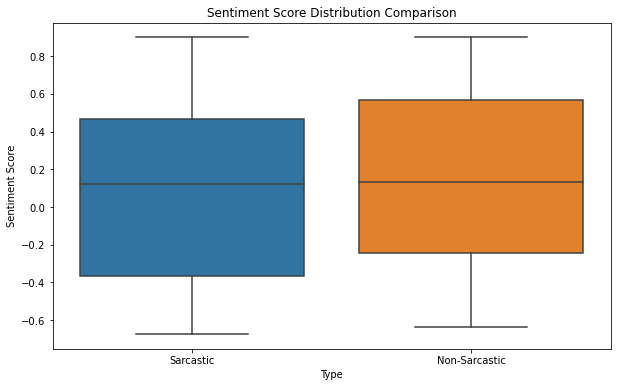

In [74]:
#Create boxplots to compare

#Convert dictionaries to lists
sarc_sentiment_scores = list(sarc_emoji_sentiment.values())
nonsarc_sentiment_scores = list(nonsarc_emoji_sentiment.values())

#Create a list indicating the type of sentiment scores
labels = ['Sarcastic'] * len(sarc_sentiment_scores) + ['Non-Sarcastic'] * len(nonsarc_sentiment_scores)

#Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels, y=sarc_sentiment_scores + nonsarc_sentiment_scores)
plt.title('Sentiment Score Distribution Comparison')
plt.xlabel('Type')
plt.ylabel('Sentiment Score')
plt.xticks([0, 1], ['Sarcastic', 'Non-Sarcastic'])
plt.show()

C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\1204058610.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sarc_sentiment_scores, label='Sarcastic', shade=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\1204058610.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True)


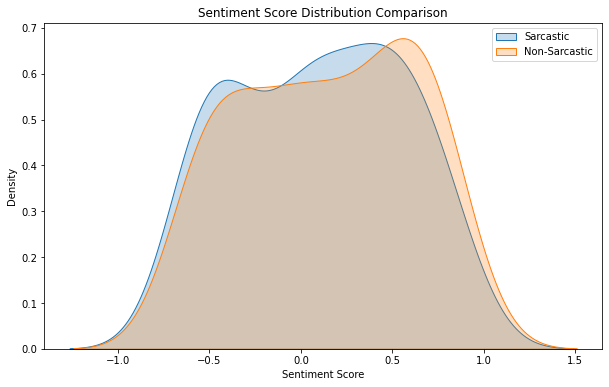

In [75]:
#Try a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sarc_sentiment_scores, label='Sarcastic', shade=True)
sns.kdeplot(nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True)
plt.title('Sentiment Score Distribution Comparison')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\niamh\AppData\Local\Temp\ipykernel_7296\47090153.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_sarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 0])
C:\Users\niamh\AppData\Local\Temp\ipykernel_7296\47090153.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neg_sarc_sentiment_scores, label='Negative', shade=True, ax=axes[0, 0])
C:\Users\niamh\AppData\Local\Temp\ipykernel_7296\47090153.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_nonsarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 1])
C:\Users\niamh\AppData\Local\Temp\ipykernel_7296\47090153.py:16: FutureWarni

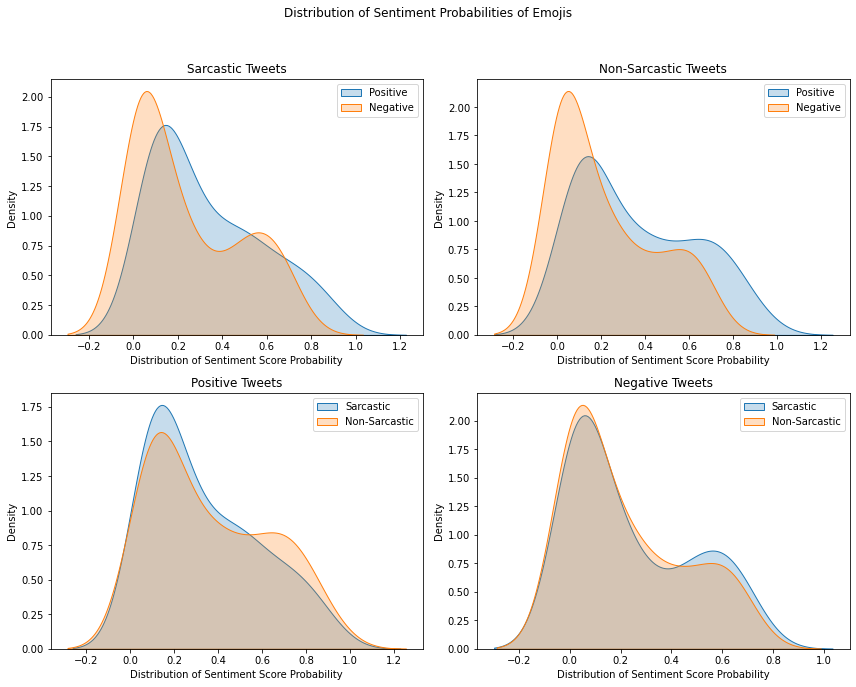

In [165]:
#Use KDE plots to compare

# Convert sentiment score dictionaries to lists
pos_sarc_sentiment_scores = list(pos_sarc_emoji_sentiment.values())
pos_nonsarc_sentiment_scores = list(pos_nonsarc_emoji_sentiment.values())
neg_sarc_sentiment_scores = list(neg_sarc_emoji_sentiment.values())
neg_nonsarc_sentiment_scores = list(neg_nonsarc_emoji_sentiment.values())

#Define layout of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Define plot content
sns.kdeplot(pos_sarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 0])
sns.kdeplot(neg_sarc_sentiment_scores, label='Negative', shade=True, ax=axes[0, 0])
sns.kdeplot(pos_nonsarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 1])
sns.kdeplot(neg_nonsarc_sentiment_scores, label='Negative', shade=True, ax=axes[0, 1])
sns.kdeplot(pos_sarc_sentiment_scores, label='Sarcastic', shade=True, ax=axes[1, 0])
sns.kdeplot(pos_nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True, ax=axes[1, 0])
sns.kdeplot(neg_sarc_sentiment_scores, label='Sarcastic', shade=True, ax=axes[1, 1])
sns.kdeplot(neg_nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True, ax=axes[1, 1])

#Set subplot titles
axes[0, 0].set_title('Sarcastic Tweets')
axes[0, 1].set_title('Non-Sarcastic Tweets')
axes[1, 0].set_title('Positive Tweets')
axes[1, 1].set_title('Negative Tweets')

#Add legends to each subplot
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

#Add axis titles for each subplot
axes[0, 0].set_xlabel('Distribution of Sentiment Score Probability')
axes[0, 0].set_ylabel('Density')
axes[0, 1].set_xlabel('Distribution of Sentiment Score Probability')
axes[0, 1].set_ylabel('Density')
axes[1, 0].set_xlabel('Distribution of Sentiment Score Probability')
axes[1, 0].set_ylabel('Density')
axes[1, 1].set_xlabel('Distribution of Sentiment Score Probability')
axes[1, 1].set_ylabel('Density')

#Set overall title
plt.suptitle('Distribution of Sentiment Probabilities of Emojis')

#Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#Show the plot
plt.show()

# Sentiment Congruence between Emoji and Words

In [60]:
#Importing libraries
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords

In [61]:
#Download the words corpus from NLTK
nltk.download("words")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [350]:
#Create a list of all words that appear in sarcastic tweets

#Concatenate all text strings in the edited_text column
all_words_sarc = " ".join(sarc['edited_text'])

#Tokenize the concatenated text into words
word_tokens = word_tokenize(all_words_sarc)

#Get the set of English stop words
stop_words = set(stopwords.words('english'))

#Filter out non-words and stopwords
english_words = set(words.words())
word_list_sarc = [word.lower() for word in word_tokens if word.lower() in english_words and word.lower() not in stop_words]

#Print the first 50 words as an example
print(word_list_sarc[:50])

['thing', 'got', 'college', 'caffeine', 'addiction', 'extended', 'fam', 'going', 'trip', 'instead', 'getting', 'like', 'bout', 'yeah', 'talking', 'ill', 'take', 'god', 'damn', 'thank', 'much', 'love', 'men', 'like', 'say', 'song', 'aint', 'bad', 'jam', 'tinnitus', 'thing', 'ever', 'love', 'loud', 'atmospheric', 'hate', 'guy', 'understand', 'easy', 'keep', 'watching', 'like', 'mind', 'ya', 'business', 'love', 'living', 'capitalist', 'society', 'look']


In [351]:
#Create a list of all words that appear in sarcastic tweets

#Concatenate all text strings in the edited_text column
all_words_nonsarc = " ".join(nonsarc['edited_text'])

#Tokenize the concatenated text into words
word_tokens = word_tokenize(all_words_nonsarc)

#Get the set of English stop words
stop_words = set(stopwords.words('english'))

#Filter out non-words and stopwords
english_words = set(words.words())
word_list_nonsarc = [word.lower() for word in word_tokens if word.lower() in english_words and word.lower() not in stop_words]

#Print the first 50 words as an example
print(word_list_nonsarc[:50])

['desperate', 'need', 'stress', 'enough', 'spring', 'break', 'said', 'say', 'mental', 'health', 'much', 'important', 'good', 'grade', 'much', 'fun', 'would', 'people', 'met', 'streaming', 'thankful', 'live', 'even', 'relatively', 'garbage', 'blast', 'get', 'pensioner', 'year', 'old', 'dare', 'take', 'dinosaur', 'crazy', 'golf', 'crushed', 'crushed', 'tell', 'desperate', 'need', 'stress', 'enough', 'spring', 'said', 'say', 'mental', 'health', 'much', 'important', 'good']


In [352]:
#Use the same sentiment polarity model as before
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

#Create the sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [353]:
#Function to calculate probabilities for label 2
def calculate_probabilities(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).squeeze().tolist()
    return probabilities  

In [482]:
#Check the sentiment congruence between the emojis and text- positive

#Create an empty list to store the differences
sentiment_differences = []

#Iterate through the rows
for index, row in df_survey.iterrows():
    text = row['edited_text']
    
    #Extract emojis
    emojis = demoji.findall(text)
    
    #Remove emojis from the text
    text_without_emojis = ' '.join(word for word in word_tokenize(text) if word not in emojis)
    
    #Calculate sentiment scores
    text_sentiment_scores = calculate_probabilities(text_without_emojis)
    emoji_sentiment_scores = calculate_probabilities(' '.join(emojis))
    
    #Calculate the absolute difference between sentiment scores
    sentiment_difference = [abs(text_score - emoji_score) for text_score, emoji_score in zip(text_sentiment_scores, emoji_sentiment_scores)]
    
    #Append the difference to the list
    sentiment_differences.append(sentiment_difference)

#Add results to the df
df_survey['sentiment_difference'] = sentiment_differences

#Print the df
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations,intensifiers,interjections,midword_capitalisation,tweet_length,sentiment_difference
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0,0,0,0,12,"[0.4504508599638939, 0.1416536271572113, 0.308..."
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0,0,0,1,3,"[0.03187689185142517, 0.18347766995429993, 0.2..."
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0,1,3,1,39,"[0.29307225346565247, 0.043260037899017334, 0...."
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0,0,0,0,5,"[0.005331921856850386, 0.22668046690523624, 0...."
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0,0,0,0,5,"[0.3245755434036255, 0.25904099084436893, 0.06..."


In [483]:
#Check the format of the row- contains the positivity, negativity and neutrality scores
df_survey['sentiment_difference'].iloc[0]

[0.4504508599638939, 0.1416536271572113, 0.30879731476306915]

In [484]:
#Add rows for differences in positivity, negativity and neutrality
df_survey['diff_neg'] = df_survey['sentiment_difference'].apply(lambda x: x[0])
df_survey['diff_neut'] = df_survey['sentiment_difference'].apply(lambda x: x[1])
df_survey['diff_pos'] = df_survey['sentiment_difference'].apply(lambda x: x[2])

#Check the df
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,...,affirmatives,negations,intensifiers,interjections,midword_capitalisation,tweet_length,sentiment_difference,diff_neg,diff_neut,diff_pos
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,...,0,0,0,0,0,12,"[0.4504508599638939, 0.1416536271572113, 0.308...",0.450451,0.141654,0.308797
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,...,0,0,0,0,1,3,"[0.03187689185142517, 0.18347766995429993, 0.2...",0.031877,0.183478,0.215355
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,...,0,0,1,3,1,39,"[0.29307225346565247, 0.043260037899017334, 0....",0.293072,0.043260,0.336332
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,...,0,0,0,0,0,5,"[0.005331921856850386, 0.22668046690523624, 0....",0.005332,0.226680,0.232012
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,...,0,0,0,0,0,5,"[0.3245755434036255, 0.25904099084436893, 0.06...",0.324576,0.259041,0.065534


In [371]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean diff_pos for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'diff_pos'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean diff_pos for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'diff_pos'].mean())

Mean diff_pos for sarcastic rows: 0.27784973407987557
Mean diff_pos for non-sarcastic rows: 0.2707291157049721


In [374]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['diff_pos'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['diff_pos'])

# Print the results
print("Shapiro-Wilk Test for 'diff_pos' in sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic 'diff_pos' values are likely normally distributed.")
else:
    print("Sarcastic 'diff_pos' values are not normally distributed.")

print("\nShapiro-Wilk Test for 'diff_pos' in nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic 'diff_pos' values are likely normally distributed.")
else:
    print("Nonsarcastic 'diff_pos' values are not normally distributed.")

Shapiro-Wilk Test for 'diff_pos' in sarcastic rows:
Statistic: 0.9064286947250366, p-value: 8.865466954305345e-14
Sarcastic 'diff_pos' values are not normally distributed.

Shapiro-Wilk Test for 'diff_pos' in nonsarcastic rows:
Statistic: 0.8865880966186523, p-value: 1.2074341372453356e-15
Nonsarcastic 'diff_pos' values are not normally distributed.


In [376]:
len(sarcastic_rows), len(nonsarcastic_rows)

(345, 359)

In [380]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['diff_pos'], nonsarcastic_rows['diff_pos'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic 'diff_pos' values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic 'diff_pos' values.")

There is no significant difference between sarcastic and nonsarcastic 'diff_pos' values.


In [372]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean diff_neut for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'diff_neut'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean diff_neut for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'diff_neut'].mean())

Mean diff_neut for sarcastic rows: 0.1974900000742164
Mean diff_neut for non-sarcastic rows: 0.2355860965637734


In [381]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['diff_neut'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['diff_neut'])

# Print the results
print("Shapiro-Wilk Test for 'diff_neut' in sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic 'diff_neut' values are likely normally distributed.")
else:
    print("Sarcastic 'diffneut' values are not normally distributed.")

print("\nShapiro-Wilk Test for 'diff_neut' in nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic 'diff_neut' values are likely normally distributed.")
else:
    print("Nonsarcastic 'diff_neut' values are not normally distributed.")

Shapiro-Wilk Test for 'diff_neut' in sarcastic rows:
Statistic: 0.9306667447090149, p-value: 1.4027045150410977e-11
Sarcastic 'diffneut' values are not normally distributed.

Shapiro-Wilk Test for 'diff_neut' in nonsarcastic rows:
Statistic: 0.9580168724060059, p-value: 1.3089885619876895e-08
Nonsarcastic 'diff_neut' values are not normally distributed.


In [382]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['diff_neut'], nonsarcastic_rows['diff_neut'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic 'diff_neut' values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic 'diff_neut' values.")

There is a significant difference between sarcastic and nonsarcastic 'diff_neut' values.


In [373]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean diff_neg for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'diff_neg'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean diff_neg for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'diff_neg'].mean())

Mean diff_neg for sarcastic rows: 0.2662380932017054
Mean diff_neg for non-sarcastic rows: 0.2411092708250806


In [383]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['diff_neg'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['diff_neg'])

# Print the results
print("Shapiro-Wilk Test for 'diff_neg' in sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic 'diff_neg' values are likely normally distributed.")
else:
    print("Sarcastic 'diff_neg' values are not normally distributed.")

print("\nShapiro-Wilk Test for 'diff_neg' in nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic 'diff_neg' values are likely normally distributed.")
else:
    print("Nonsarcastic 'diff_neg' values are not normally distributed.")

Shapiro-Wilk Test for 'diff_neg' in sarcastic rows:
Statistic: 0.9164806604385376, p-value: 6.405792779898278e-13
Sarcastic 'diff_neg' values are not normally distributed.

Shapiro-Wilk Test for 'diff_neg' in nonsarcastic rows:
Statistic: 0.9153075814247131, p-value: 2.4755772518730845e-13
Nonsarcastic 'diff_neg' values are not normally distributed.


In [384]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['diff_neg'], nonsarcastic_rows['diff_neg'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic 'diff_neg' values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic 'diff_neg' values.")

There is no significant difference between sarcastic and nonsarcastic 'diff_neg' values.


In [385]:
#Check the df
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,sentiment_difference,diff_neg,diff_neut,diff_pos
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[0.4504508599638939, 0.1416536271572113, 0.308...",0.450451,0.141654,0.308797
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,"[0.03187689185142517, 0.18347766995429993, 0.2...",0.031877,0.183478,0.215355
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[0.29307225346565247, 0.043260037899017334, 0....",0.293072,0.043260,0.336332
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[0.005331921856850386, 0.22668046690523624, 0....",0.005332,0.226680,0.232012
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[0.3245755434036255, 0.25904099084436893, 0.06...",0.324576,0.259041,0.065534


In [485]:
#Remove extraneous cols
df_survey = df_survey.drop(columns=['sentiment_difference', 'diff_neg', 'diff_neut', 'diff_pos'])
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations,intensifiers,interjections,midword_capitalisation,tweet_length
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0,0,0,0,12
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0,0,0,1,3
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0,1,3,1,39
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0,0,0,0,5
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0,0,0,0,5


In [489]:
#Create an empty list to store the sentiment scores
sentiment_scores = []

#Iterate through the rows
for index, row in df_survey.iterrows():
    text = row['edited_text']
    
    #Remove emojis from the text
    text_without_emojis = ' '.join(word for word in word_tokenize(text) if word not in emojis)
    
    #Calculate sentiment scores
    text_sentiment_scores = calculate_probabilities(text_without_emojis)
    
    #Append the score to the list
    sentiment_scores.append(text_sentiment_scores)

#Add results to the df
df_survey['sentiment_scores'] = sentiment_scores

#Print the df
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,...,affirmatives,negations,intensifiers,interjections,midword_capitalisation,tweet_length,sentiment_scores,sent_neg,sent_neut,sent_pos
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,...,0,0,0,0,0,12,"[0.1715908795595169, 0.5636150240898132, 0.264...",0.171591,0.563615,0.264794
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,...,0,0,0,0,1,3,"[0.29017117619514465, 0.6347501277923584, 0.07...",0.290171,0.634750,0.075079
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,...,0,0,1,3,1,39,"[0.1839650273323059, 0.3861538767814636, 0.429...",0.183965,0.386154,0.429881
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,...,0,0,0,0,0,5,"[0.0015152746345847845, 0.00982738845050335, 0...",0.001515,0.009827,0.988657
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,...,0,0,0,0,0,5,"[0.9546178579330444, 0.039340902119874954, 0.0...",0.954618,0.039341,0.006041


In [490]:
#Add rows for differences in positivity, negativity and neutrality
df_survey['sent_neg'] = df_survey['sentiment_scores'].apply(lambda x: x[0])
df_survey['sent_neut'] = df_survey['sentiment_scores'].apply(lambda x: x[1])
df_survey['sent_pos'] = df_survey['sentiment_scores'].apply(lambda x: x[2])

#Check the df
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,...,affirmatives,negations,intensifiers,interjections,midword_capitalisation,tweet_length,sentiment_scores,sent_neg,sent_neut,sent_pos
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,...,0,0,0,0,0,12,"[0.1715908795595169, 0.5636150240898132, 0.264...",0.171591,0.563615,0.264794
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,...,0,0,0,0,1,3,"[0.29017117619514465, 0.6347501277923584, 0.07...",0.290171,0.634750,0.075079
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,...,0,0,1,3,1,39,"[0.1839650273323059, 0.3861538767814636, 0.429...",0.183965,0.386154,0.429881
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,...,0,0,0,0,0,5,"[0.0015152746345847845, 0.00982738845050335, 0...",0.001515,0.009827,0.988657
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,...,0,0,0,0,0,5,"[0.9546178579330444, 0.039340902119874954, 0.0...",0.954618,0.039341,0.006041


In [491]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'sent_pos'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'sent_pos'].mean())

Mean for sarcastic rows: 0.31890993552700875
Mean for non-sarcastic rows: 0.36063798474443653


In [492]:
#Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

#Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['sent_pos'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['sent_pos'])

#Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.8101184964179993, p-value: 8.040944540210702e-20
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.7668365240097046, p-value: 3.1596368268029676e-22
Nonsarcastic values are not normally distributed.


In [493]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['sent_pos'], nonsarcastic_rows['sent_pos'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


In [494]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'sent_neut'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'sent_neut'].mean())

Mean for sarcastic rows: 0.32981649674205243
Mean for non-sarcastic rows: 0.2971465412869759


In [495]:
#Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

#Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['sent_neut'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['sent_neut'])

#Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.9629706144332886, p-value: 1.1437666813662872e-07
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.9124135375022888, p-value: 1.3742148695025658e-13
Nonsarcastic values are not normally distributed.


In [496]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['sent_neut'], nonsarcastic_rows['sent_neut'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is a significant difference between sarcastic and nonsarcastic values.


In [497]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'sent_neg'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'sent_neg'].mean())

Mean for sarcastic rows: 0.35127356663292303
Mean for non-sarcastic rows: 0.3422154747881968


In [498]:
#Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

#Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['sent_neg'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['sent_neg'])

#Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.8978724479675293, p-value: 1.8427010338071224e-14
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.8385636210441589, p-value: 1.0309321546273957e-18
Nonsarcastic values are not normally distributed.


In [499]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['sent_neg'], nonsarcastic_rows['sent_neg'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


In [500]:
#Calculate sentimnet score for text based on previous definition
df_survey['sentiment_score'] = df_survey['sent_pos'] + (df_survey['sent_neg'] * -1)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,...,negations,intensifiers,interjections,midword_capitalisation,tweet_length,sentiment_scores,sent_neg,sent_neut,sent_pos,sentiment_score
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,...,0,0,0,0,12,"[0.1715908795595169, 0.5636150240898132, 0.264...",0.171591,0.563615,0.264794,0.093203
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,...,0,0,0,1,3,"[0.29017117619514465, 0.6347501277923584, 0.07...",0.290171,0.634750,0.075079,-0.215092
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,...,0,1,3,1,39,"[0.1839650273323059, 0.3861538767814636, 0.429...",0.183965,0.386154,0.429881,0.245916
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,...,0,0,0,0,5,"[0.0015152746345847845, 0.00982738845050335, 0...",0.001515,0.009827,0.988657,0.987142
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,...,0,0,0,0,5,"[0.9546178579330444, 0.039340902119874954, 0.0...",0.954618,0.039341,0.006041,-0.948577


In [501]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'sentiment_score'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'sentiment_score'].mean())

Mean for sarcastic rows: -0.03236363110591428
Mean for non-sarcastic rows: 0.01842250995623975


In [503]:
#Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

#Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['sentiment_score'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['sentiment_score'])

#Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.9334858655929565, p-value: 2.720335588735079e-11
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.8880950808525085, p-value: 1.5567980644171737e-15
Nonsarcastic values are not normally distributed.


In [504]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['sentiment_score'], nonsarcastic_rows['sentiment_score'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Capitalised words

In [389]:
#Define function to count capitalised words
def count_capital_words(text):
    words = text.split()
    capital_words_count = sum(1 for word in words if word[0].isupper())
    return capital_words_count

#Apply to tweets column
df_survey['capitalised_words'] = df_survey['edited_text'].apply(count_capital_words)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0


In [408]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'capitalised_words'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'capitalised_words'].mean())

Mean for sarcastic rows: 1.892753623188406
Mean for non-sarcastic rows: 2.3064066852367686


In [409]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['capitalised_words'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['capitalised_words'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.7472352981567383, p-value: 1.3255843208668561e-22
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.7844271063804626, p-value: 1.8907622144212865e-21
Nonsarcastic values are not normally distributed.


In [410]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['capitalised_words'], nonsarcastic_rows['capitalised_words'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is a significant difference between sarcastic and nonsarcastic values.


# User Mentions

In [391]:
#User mentions

#Define function to count user mentions
def count_user_mentions(text):
    words = text.split()
    user_mentions_count = sum(1 for word in words if word.startswith('@'))
    return user_mentions_count

#Apply to tweets column
df_survey['user_mentions'] = df_survey['edited_text'].apply(count_user_mentions)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0


In [411]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'user_mentions'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'user_mentions'].mean())

Mean for sarcastic rows: 0.1681159420289855
Mean for non-sarcastic rows: 0.3426183844011142


In [412]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['user_mentions'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['user_mentions'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for in nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.3820197582244873, p-value: 1.4381206538207136e-32
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for in nonsarcastic rows:
Statistic: 0.5196695327758789, p-value: 4.3884852850660945e-30
Nonsarcastic values are not normally distributed.


In [413]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['user_mentions'], nonsarcastic_rows['user_mentions'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is a significant difference between sarcastic and nonsarcastic values.


# Hashtags

In [392]:
#Hashtags

#Define function to count hashtags
def count_hashtags(text):
    words = text.split()
    hashtag_count = sum(1 for word in words if word.startswith('#'))
    return hashtag_count

#Apply to tweets column
df_survey['hashtags'] = df_survey['edited_text'].apply(count_hashtags)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0


In [402]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean sarc:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'hashtags'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean nonsarc:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'hashtags'].mean())

Mean sarc: 0.10434782608695652
Mean nonsarc: 0.14763231197771587


In [403]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['hashtags'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['hashtags'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.23637396097183228, p-value: 3.292094472468002e-35
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.363186240196228, p-value: 1.715384212475579e-33
Nonsarcastic values are not normally distributed.


In [404]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['hashtags'], nonsarcastic_rows['hashtags'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Laughter indicators

In [393]:
#Laughter markers

#Define the function to count laughter occurrences
def count_laughter(text):
    words = text.split()
    laugh_count = sum(1 for word in words if word.startswith("haha") or re.match('l(o)+l$', word, re.IGNORECASE))
    return laugh_count

#Apply to tweets column
df_survey['laughter'] = df_survey['edited_text'].apply(count_laughter)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0


In [405]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'laughter'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'laughter'].mean())

Mean for sarcastic rows: 0.02318840579710145
Mean for non-sarcastic rows: 0.008356545961002786


In [406]:
# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['laughter'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['laughter'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.13320332765579224, p-value: 7.668283659474644e-37
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.06352704763412476, p-value: 1.8307514619596687e-38
Nonsarcastic values are not normally distributed.


In [407]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['laughter'], nonsarcastic_rows['laughter'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Punctuation

In [394]:
#Make a list of potentially relevant punctuation 
#Commas, quotation marks single colons etc as these are unlikely to be relevant for the problem set
#Only what may be relevant is added to the list
punctuation = ["?", "!", "..."]

#Define the function to count relevant punctuation
def count_punctuation(text, punctuation):
    words = text.split()
    punctuation_count = sum(text.count(p) for p in punctuation)
    return punctuation_count
    
#Apply to tweets column
df_survey['punctuation'] = df_survey['edited_text'].apply(lambda x: count_punctuation(x, punctuation))
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0


In [414]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'punctuation'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'punctuation'].mean())

Mean for sarcastic rows: 0.4057971014492754
Mean for non-sarcastic rows: 0.4596100278551532


In [415]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['punctuation'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['punctuation'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.43494898080825806, p-value: 1.747740517328008e-31
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.4351387023925781, p-value: 5.090738070487448e-32
Nonsarcastic values are not normally distributed.


In [416]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['punctuation'], nonsarcastic_rows['punctuation'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Affirmatives

In [395]:
#Affermatives

#Make list of strong affermatives
strong_affermatives = ["yes", "yeah", "always", "all", "any", "every", "everybody", "everywhere", "ever"]

#Define the function to count strong affermatives
def count_affermatives(text, strong_affermatives):
    words = text.split()
    affermatives_count = sum(text.count(n) for n in strong_affermatives)
    return affermatives_count
    
#Apply to tweets column
df_survey['affirmatives'] = df_survey['edited_text'].apply(lambda x: count_affermatives(x, strong_affermatives))
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0


In [417]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'affirmatives'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'affirmatives'].mean())

Mean for sarcastic rows: 0.5739130434782609
Mean for non-sarcastic rows: 0.5487465181058496


In [418]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['affirmatives'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['affirmatives'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.6659966707229614, p-value: 1.6681822160769472e-25
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.6440621614456177, p-value: 1.1317131050280809e-26
Nonsarcastic values are not normally distributed.


In [419]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['affirmatives'], nonsarcastic_rows['affirmatives'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Negations

In [396]:
#Negations

#Make list of strong negations
strong_negations = ["no", "not", "never", "none", "n't", "nothing", "neither", "nobody", "nowhere"]

#Define the function to count strong negations
def count_negation(text, strong_negations):
    words = text.split()
    negations_count = sum(text.count(n) for n in strong_negations)
    return negations_count
    
#Apply to tweets column
df_survey['negations'] = df_survey['edited_text'].apply(lambda x: count_negation(x, strong_negations))
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0


In [420]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'negations'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'negations'].mean())

Mean for sarcastic rows: 0.5159420289855072
Mean for non-sarcastic rows: 0.5181058495821727


In [421]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['negations'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['negations'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.6126056909561157, p-value: 4.008474971108086e-27
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.573259174823761, p-value: 1.0344134823823602e-28
Nonsarcastic values are not normally distributed.


In [422]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['negations'], nonsarcastic_rows['negations'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Intensifiers

In [398]:
#Intensifiers

#Make a list of intensifiers
intensifiers = ["amazingly", "astoundingly", "awful", "bare", "bloody", "crazy", "dreadfully",
                "colossally", "especially", "exceptionally", "excessively", "extremely",
                "extraordinarily", "fantastically", "frightfully", "fucking", "fully", "hella",
                "holy", "incredibly", "insanely", "literally", "mightily", "moderately", "most",
                "outrageously", "phenomenally", "precious", "quite", "radically", "rather",
                "really", "remarkably", "right", "sick", "strikingly", "super", "supremely",
                "surprisingly", "terribly", "terrifically", "too", "totally", "uncommonly",
                "unusually", "veritable", "very", "wicked"]

#Define the function to count intensifiers
def count_intensifiers(text, intensifiers):
    words = text.split()
    intensifier_count = sum(text.count(n) for n in intensifiers)
    return intensifier_count
    
#Apply to tweets column
df_survey['intensifiers'] = df_survey['edited_text'].apply(lambda x: count_intensifiers(x, intensifiers))
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations,intensifiers
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0,1
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0,0


In [423]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'intensifiers'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'intensifiers'].mean())

Mean for sarcastic rows: 0.42318840579710143
Mean for non-sarcastic rows: 0.35376044568245124


In [424]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['intensifiers'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['intensifiers'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.5897871255874634, p-value: 9.201894903497941e-28
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.515457034111023, p-value: 3.464762263963943e-30
Nonsarcastic values are not normally distributed.


In [425]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['intensifiers'], nonsarcastic_rows['intensifiers'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Interjections

In [399]:
#Interjections

#Make a list of interjections
interjections = ["oh", "hey", "wow", "aha", "aham", "aw", "bam", "blah", "bingo", "boo", "bravo",
                 "cheers", "congratulations", "congrats", "duh", "eh", "gee", "gosh", "hey", "hmm",
                 "huh", "hurray", "oh", "oh dear", "oh my", "oh well", "oops", "ouch", "ow", "phew",
                 "shh", "uh", "uh-huh", "mhm", "ugh", "well", "wow", "woah", "yeah", "yep", "yikes", "yo"]

#Define the function to count interjections
def count_interjections(text, interjections):
    words = text.split()
    interjection_count = sum(text.count(n) for n in interjections)
    return interjection_count
    
#Apply to tweets column
df_survey['interjections'] = df_survey['edited_text'].apply(lambda x: count_interjections(x, interjections))
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations,intensifiers,interjections
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0,0,0
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0,1,3
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0,0,0


In [426]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'interjections'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'interjections'].mean())

Mean for sarcastic rows: 1.5507246376811594
Mean for non-sarcastic rows: 0.8635097493036211


In [427]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['interjections'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['interjections'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.7195801734924316, p-value: 1.1580594051197521e-23
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.6917186975479126, p-value: 4.1009609620064394e-25
Nonsarcastic values are not normally distributed.


In [428]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['interjections'], nonsarcastic_rows['interjections'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is a significant difference between sarcastic and nonsarcastic values.


# Mid-word capitalisations

In [400]:
#Capitalisations in the middle of words

#Define the function to count capitalisation in the middle of words
def count_midword_capitalisation(text):
    words = text.split()
    midword_capitalisation_count = sum(1 for word in words if any(char.isupper() for char in word[1:]))
    return midword_capitalisation_count

#Apply to tweets column
df_survey['midword_capitalisation'] = df_survey['edited_text'].apply(count_midword_capitalisation)
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations,intensifiers,interjections,midword_capitalisation
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0,0,0,0
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0,0,0,1
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0,1,3,1
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0,0,0,0
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0,0,0,0


In [429]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'midword_capitalisation'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'midword_capitalisation'].mean())

Mean for sarcastic rows: 0.48985507246376814
Mean for non-sarcastic rows: 0.8161559888579387


In [430]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['midword_capitalisation'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['midword_capitalisation'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.3055998682975769, p-value: 5.205552295519206e-34
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.4601948857307434, p-value: 1.7985342159742144e-31
Nonsarcastic values are not normally distributed.


In [432]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['midword_capitalisation'], nonsarcastic_rows['midword_capitalisation'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is a significant difference between sarcastic and nonsarcastic values.


# Tweet length

In [401]:
#Length of tweets
df_survey['tweet_length'] = df_survey['edited_text'].apply(lambda x: len(x.split()))
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,capitalised_words,user_mentions,hashtags,laughter,punctuation,affirmatives,negations,intensifiers,interjections,midword_capitalisation,tweet_length
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,2,0,0,0,0,0,0,0,0,0,12
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.,1,1,0,0,0,0,0,0,0,1,3
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...",4,0,0,0,1,0,0,1,3,1,39
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,0,0,0,0,0,0,0,0,0,0,5
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,0,0,0,0,0,0,0,0,0,0,5


In [433]:
#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is sarcastic', 'tweet_length'].mean())

#Filter rows with class_survey 'It is sarcastic' and calculate the mean of diff_pos
print('Mean for non-sarcastic rows:', df_survey.loc[df_survey['class_survey'] == 'It is not sarcastic', 'tweet_length'].mean())

Mean for sarcastic rows: 19.0231884057971
Mean for non-sarcastic rows: 18.498607242339833


In [434]:
# Filter rows with class_survey 'It is sarcastic' and 'It is not sarcastic'
sarcastic_rows = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarcastic_rows = df_survey[df_survey['class_survey'] == 'It is not sarcastic']

# Perform Shapiro-Wilk test for 'diff_pos' in sarcastic and nonsarcastic rows
shapiro_statistic_sarcasm, shapiro_p_value_sarcasm = shapiro(sarcastic_rows['tweet_length'])
shapiro_statistic_nonsarcasm, shapiro_p_value_nonsarcasm = shapiro(nonsarcastic_rows['tweet_length'])

# Print the results
print("Shapiro-Wilk Test for sarcastic rows:")
print(f"Statistic: {shapiro_statistic_sarcasm}, p-value: {shapiro_p_value_sarcasm}")
if shapiro_p_value_sarcasm > 0.05:
    print("Sarcastic values are likely normally distributed.")
else:
    print("Sarcastic values are not normally distributed.")

print("\nShapiro-Wilk Test for nonsarcastic rows:")
print(f"Statistic: {shapiro_statistic_nonsarcasm}, p-value: {shapiro_p_value_nonsarcasm}")
if shapiro_p_value_nonsarcasm > 0.05:
    print("Nonsarcastic values are likely normally distributed.")
else:
    print("Nonsarcastic values are not normally distributed.")

Shapiro-Wilk Test for sarcastic rows:
Statistic: 0.9291378259658813, p-value: 9.866741104702648e-12
Sarcastic values are not normally distributed.

Shapiro-Wilk Test for nonsarcastic rows:
Statistic: 0.9065399765968323, p-value: 4.3311356020744873e-14
Nonsarcastic values are not normally distributed.


In [435]:
#Non parametric test is suitable

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarcastic_rows['tweet_length'], nonsarcastic_rows['tweet_length'].sample(n=345, random_state=41))

#Check the p-value to determine if there's a significant difference
alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference between sarcastic and nonsarcastic values.")
else:
    print("There is no significant difference between sarcastic and nonsarcastic values.")

There is no significant difference between sarcastic and nonsarcastic values.


# Topic Modelling Sarcastic Content

In [530]:
#Importing libraries
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import bigrams, trigrams
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.metrics import silhouette_score

In [53]:
#Check df
sarc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t..."
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢
5,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...


In [54]:
#Copy the tweets to another column for processing
sarc['tweets_copy'] = sarc['edited_text']
sarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\2703526507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['tweets_copy'] = sarc['edited_text']


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,The only thing I got from college was a caffei...
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","""My (extended) fam was discussing going on a t..."
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,i love shoegaze sm 😁
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,men are so grimey 😢
5,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,okay but like the say so song aint that bad. I...


In [55]:
#Dictionary for mapping contractions
contractions = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "ve": "have", "cause": "because",
                "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
                "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
                "haven't": "have not", "ll": "will", "n": "and", "s": "is", "d": "would", "m": "am", "isn't": "is not",
                "it'd": "it would", "it'd've": "it would have", "let's": "let us", "all's": "all", "ma'am": "madam",
                "b'day": "birthday", "might've": "might have", "must've": "must have", "mustn't": "must not",
                "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
                "oughtn't": "ought not", "oughtn't've": "ought not have", "she'll": "she will", "she'd": "she would",
                "he'd": "he would", "i'd": "I would", "i'm": "I am", "shan't": "shall not", "sha'n't": "shall not",
                "shan't've": "shall not have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                "that'd": "that would",  "that's": "that is","there'd": "there would", "there'd've": "there would have",
                "there's": "there is", "to've": "to have", "wasn't": "was not", "re": "are", "weren't": "were not",
                "what'll": " what will", "what'll've": "what will have", "what're": "what are", "they're": "they are",
                "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                "where's": "where is", "where've": "where have", "who'll": " who will", "who'll've": "who will have",
                "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                "wouldn't've": "would not have", "y'all": "you all", "y'll": "you all", "ya'll": "you all",
                "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
                "y'all've": "you all have", "c'mon": "come on", "ma": "am going to"}


#Dictionary for mapping slang
slang = {"4ward": "forward", "brb": "be right back", "b4": "before", "bfn": "bye for now", "bgd": "background",
         "btw": "by the way", "br": "best regards", "clk": "click", "da": "the", "deet": "detail", "deets": "details",
         "dm": "direct message", "f2f": "face to face", "ftl": " for the loss", "ftw": "for the win", "kk" : "cool cool",
         "kewl": "cool", "rt": "retweet", "smh": "so much hate", "yaass": "yes", "a$$":"ass", "bby": "baby", "bc": "because",
         "coz": "because","cuz": "because", "cause": "because", "cmon": "come on", "cmonn": "come on", "dafuq": "what the fuck",
         "dafuk": "what the fuck", "dis": "this", "diss": "this", "ma": "my", "dono": "do not know", "donno": "do not know",
         "dunno": "do not know", "fb": "facebook", "couldnt": "could not", "n": "and", "gtg": "got to go", "yep": "yes",
         "yw": "you are welcome", "im": "i am", "youre":"you are", "hes": "he is", "shes": "she is", "theyre": "they are", 
         "af": "as fuck", "fam": "family", "fwd": "forward", "ffs": "for fuck sake", "fml": "fuck my life",
         "lol": "laugh out loud", "lel": "laugh out loud", "lool": "laugh out loud", "lmao": "laugh my ass off",
         "lmaoo": "laugh my ass off", "omg":"oh my god", "oomg":"oh my god", "omgg":"oh my god", "omfg": "oh my fucking god", 
         "stfu": "shut the fuck up", "awsome":"awesome", "imo": "in my opinion", "imho": "in my humble opinion",
         "ily": "i love you", "ilyy": "i love you", "ikr": "i know right", "ikrr": "i know right", "idk": "i do not know",
         "jk": "joking", "lmk": "let me know", "nsfw": "not safe for work", "hehe": "haha", "tmrw": "tomorrow", "yt": "youtube",
         "hahaha": "haha", "hihi": "haha", "pls": "please", "ppl": "people", "wtf": "what the fuck", "wth": "what teh hell",
         "obv": "obviously", "nomore": "no more", "u": "you", "ur": "your", "wanna": "want to", "luv": "love", "imma": "i am",
         "&": "and", "thanx": "thanks", "til": "until", "till": "until", "thx": "thanks", "pic": "picture", "pics": "pictures",
         "gp": "doctor", "xmas": "christmas", "rlly": "really", "boi": "boy", "boii": "boy", "rly": "really", "whch": "which",
         "awee": "awesone",  "sux" : "sucks", "nd": "and", "fav": "favourite", "frnds": "friends", "info": "information", 
         "loml": "love of my life", "bffl": "best friend for life", "gg": "goog game", "xx": "love", "xoxo": "love", 
         "thats": "that is", "homie": "best friend", "homies": "best friends"}

In [56]:
#Preprocess the tweets

#Define fucntion to remove user mentions
def remove_mentions(text):
    pattern = r'@\w+\s?'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(remove_mentions)

print('User mentions removed')

#Remove urls from tweets
def remove_urls(text):
    text_without_urls = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    return text_without_urls
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(remove_urls)

print('URLs removed')

#Spellcheck words
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    corrected_words = [spell.correction(word) if word in misspelled else word for word in words]
    corrected_words = [word for word in corrected_words if word is not None]
    corrected_text = " ".join(corrected_words)
    return corrected_text
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(correct_spelling)

print('Spellcheck complete')

#Define function to replace contractions with the full expression 
def replace_contractions(text):
    words = text.split()
    # Replacing contracted words with their full expressions
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(replace_contractions)

print('Contractions replaced')

#Define function to replace slang
def replace_slang(text):
    words = text.split()
    expanded_words = [slang[word] if word in slang else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(replace_slang)

print('Slang replaced')

#Remove punctuation from tweets
def remove_punctuation(text):
    cleaned_text = cleaned_text = re.sub(r'[^a-zA-Z\s.]', '', text)
    return cleaned_text
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(remove_punctuation)

print('Punctuation removed')

#Tokenize tweets
sarc['tweets_copy'] = [simple_preprocess(tweet) for tweet in sarc['tweets_copy']]

print('Tweets tokenised')

#Remove stopwords
#Get English stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))
#Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nltk_stopwords]
#Apply the function
sarc['tweets_copy'] = sarc['tweets_copy'].apply(remove_stopwords)

print('Stopwords removed')

#Build the bigram and trigram models
bigram = gensim.models.Phrases(sarc['tweets_copy'], min_count=1, threshold=5)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[sarc['tweets_copy']], threshold=100)  
trigram_mod = gensim.models.phrases.Phraser(trigram)


#Make bigrams
#tokenized_tweets = sarc['tweets_copy'].tolist()
#tweets_bigrams = [bigram_mod[tweet] for tweet in tokenized_tweets]
#sarc['tweets_copy'] = [' '.join(tweet) for tweet in tweets_bigrams]

#print('Bigram and trigrams complete')

#Stem words
#Initialize the stemmer
stemmer = PorterStemmer()
#Apply stemming
sarc['tweets_copy'] = sarc['tweets_copy'].apply(lambda tweet: [stemmer.stem(word) for word in tweet])
#Print a sample of the stemmed tweets
print(sarc.loc[0, 'tweets_copy'])

#Check if tweets are tokenized
#is_tokenized = sarc['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
#print(is_tokenized)

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\386754502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['tweets_copy'] = sarc['tweets_copy'].apply(remove_mentions)
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\386754502.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['tweets_copy'] = sarc['tweets_copy'].apply(remove_urls)


User mentions removed
URLs removed
Spellcheck complete
Contractions replaced
Slang replaced
Punctuation removed
Tweets tokenised
Stopwords removed
['thing', 'got', 'colleg', 'caffein', 'addict']


C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\386754502.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['tweets_copy'] = sarc['tweets_copy'].apply(correct_spelling)
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\386754502.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['tweets_copy'] = sarc['tweets_copy'].apply(replace_contractions)
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\386754502.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [58]:
#Tokenize the tweets
#sarc['tweets_copy'] = sarc['tweets_copy'].apply(nltk.word_tokenize)

#Check if tweets are tokenized
is_tokenized = sarc['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
print(is_tokenized)

True


In [62]:
#Download WordNet Database
nltk.download('wordnet')

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

#Define function to get WordNet POS tag for better lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Define function to perform lemmatization
def lemmatization(tokens_list):
    lemmatized_tweets = []
    for tweet in tokens_list:
        pos_tags = nltk.pos_tag(tweet)
        lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
        lemmatized_tweets.append(lemmatized_tokens)
    return lemmatized_tweets

#Apply functions
sarc['tweets_copy'] = lemmatization(sarc['tweets_copy'])

# Print a sample of the lemmatized tokens
print(sarc.loc[0, 'tweets_copy'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['thing', 'get', 'colleg', 'caffein', 'addict']


C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\1050419947.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['tweets_copy'] = lemmatization(sarc['tweets_copy'])


In [63]:
#Create a dictionary and corpus for topic modelling

#Create dictionary
id2word = corpora.Dictionary(sarc['tweets_copy'])

#Create corpus
texts = sarc['tweets_copy']

#Term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

#Ckeck
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(3, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(25, 1), (26, 1)], [(27, 1), (28, 1)], [(15, 1), (17, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(4, 1), (25, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(15, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(3, 3), (13, 1), (25, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(19, 1), (21, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(11, 1), (76, 1), (77, 1), (78, 1)], [(15, 1), (37, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)], [(11, 1), (55, 1), (8

In [64]:
#Check one of the words
id2word[0]

'addict'

In [65]:
#Check the term frequencies for the furst tweet
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('addict', 1), ('caffein', 1), ('colleg', 1), ('get', 1), ('thing', 1)]]

In [66]:
#Create an initial model to test code

#Create a dictionary from the preprocessed text data
dictionary = corpora.Dictionary(sarc['tweets_copy'])

#Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tweet) for tweet in sarc['tweets_copy']]

#Train LDA model
num_topics = 5  # You can choose the number of topics
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

#Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

#Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=sarc['tweets_copy'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")

Topic 0: 0.016*"love" + 0.011*"go" + 0.010*"face" + 0.009*"tell" + 0.009*"someon" + 0.009*"work" + 0.009*"wait" + 0.009*"weight" + 0.008*"lose" + 0.008*"like"
Topic 1: 0.019*"get" + 0.019*"day" + 0.012*"know" + 0.012*"anyon" + 0.011*"first" + 0.011*"lock" + 0.009*"enough" + 0.009*"suppos" + 0.009*"time" + 0.008*"think"
Topic 2: 0.014*"like" + 0.013*"go" + 0.013*"wow" + 0.012*"realli" + 0.012*"take" + 0.010*"haha" + 0.008*"thing" + 0.008*"long" + 0.008*"thought" + 0.008*"growth"
Topic 3: 0.026*"one" + 0.024*"alway" + 0.023*"super" + 0.021*"polit" + 0.021*"aw" + 0.020*"citi" + 0.020*"film" + 0.020*"villain" + 0.020*"confin" + 0.020*"invas"
Topic 4: 0.040*"kill" + 0.027*"love" + 0.022*"yeah" + 0.020*"dont" + 0.019*"chill" + 0.019*"spill" + 0.019*"spider" + 0.019*"room" + 0.019*"soda" + 0.018*"keyboard"
Coherence Score: 0.4132867255222984


In [69]:
#Define hyperparameter ranges
num_topics_range = [3, 4]
alpha_range = ['symmetric', 'asymmetric', 'auto']
passes_range = [2, 5, 10, 25, 50]
chunksize_range = [10, 50, 75, 100]

best_coherence_score = -1.0
best_lda_model = None

#Hyperparameter tuning loop
for num_topics in num_topics_range:
    for alpha in alpha_range:
        for passes in passes_range:
            for chunksize in chunksize_range:
                print('Starting new test')
                # Train LDA model
                lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix,
                                                            num_topics=num_topics,
                                                            id2word=dictionary,
                                                            alpha=alpha,
                                                            passes=passes,
                                                            chunksize=chunksize)

                #Calculate coherence score
                coherence_model_lda = CoherenceModel(model=lda_model,
                                                     texts=sarc['tweets_copy'],
                                                     dictionary=dictionary,
                                                     coherence='c_v')
                coherence_score = coherence_model_lda.get_coherence()

                #Check if this model has a higher coherence score
                if coherence_score > best_coherence_score:
                    best_coherence_score = coherence_score
                    best_lda_model = lda_model

#Use the best_lda_model with the best hyperparameters for further analysis
if best_lda_model is not None:
    print("Best Hyperparameters:")
    print("Num Topics:", best_lda_model.num_topics)
    print("Alpha:", best_lda_model.alpha)
    print("Passes:", best_lda_model.passes)
    print("Chunksize:", best_lda_model.chunksize)
    print("Best Coherence Score:", best_coherence_score)

    # Print the topics of the best model
    print("\nTopics of the Best Model:")
    topics = best_lda_model.print_topics()
    for topic in topics:
        print(topic)
else:
    print("No best model found. Consider expanding the hyperparameter search range.")

Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting n

In [73]:
#Copy the tweets to another column for processing
nonsarc['tweets_copy'] = nonsarc['edited_text']
nonsarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\4060444679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarc['tweets_copy'] = nonsarc['edited_text']


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy
13,2,Yes,Yes,Male,18-24,in desperate need of (and I can NOT stress thi...,It is not sarcastic,in desperate need of (and I can NOT stress thi...,in desperate need of (and I can NOT stress thi...
14,2,Yes,Yes,Male,18-24,I've said it before and I'll say it again but ...,It is not sarcastic,I've said it before and I'll say it again but ...,I've said it before and I'll say it again but ...
17,2,Yes,Yes,Male,18-24,I couldnt have imagined how much fun I would h...,It is not sarcastic,I couldnt have imagined how much fun I would h...,I couldnt have imagined how much fun I would h...
19,2,Yes,Yes,Male,18-24,do i just blast maneskin to get hyped for my o...,It is not sarcastic,do i just blast maneskin to get hyped for my o...,do i just blast maneskin to get hyped for my o...
22,3,Yes,Yes,I don't want to say,25-34,ANY PENSIONER AND 4 YEAR OLD WHO DARE TAKE ME ...,It is not sarcastic,ANY PENSIONER AND 4 YEAR OLD WHO DARE TAKE ME ...,ANY PENSIONER AND 4 YEAR OLD WHO DARE TAKE ME ...


In [74]:
#Preprocess the tweets

#Define fucntion to remove user mentions
def remove_mentions(text):
    pattern = r'@\w+\s?'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(remove_mentions)

print('User mentions removed')

#Remove urls from tweets
def remove_urls(text):
    text_without_urls = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    return text_without_urls
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(remove_urls)

print('URLs removed')

#Spellcheck words
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    corrected_words = [spell.correction(word) if word in misspelled else word for word in words]
    corrected_words = [word for word in corrected_words if word is not None]
    corrected_text = " ".join(corrected_words)
    return corrected_text
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(correct_spelling)

print('Spellcheck complete')

#Define function to replace contractions with the full expression 
def replace_contractions(text):
    words = text.split()
    # Replacing contracted words with their full expressions
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(replace_contractions)

print('Contractions replaced')

#Define function to replace slang
def replace_slang(text):
    words = text.split()
    expanded_words = [slang[word] if word in slang else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(replace_slang)

print('Slang replaced')

#Remove punctuation from tweets
def remove_punctuation(text):
    cleaned_text = cleaned_text = re.sub(r'[^a-zA-Z\s.]', '', text)
    return cleaned_text
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(remove_punctuation)

print('Punctuation removed')

#Tokenize tweets
nonsarc['tweets_copy'] = [simple_preprocess(tweet) for tweet in nonsarc['tweets_copy']]

print('Tweets tokenised')

#Remove stopwords
#Get English stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))
#Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nltk_stopwords]
#Apply the function
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(remove_stopwords)

print('Stopwords removed')

#Build the bigram and trigram models
bigram = gensim.models.Phrases(nonsarc['tweets_copy'], min_count=1, threshold=5)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[sarc['tweets_copy']], threshold=100)  
trigram_mod = gensim.models.phrases.Phraser(trigram)


#Make bigrams
#tokenized_tweets = sarc['tweets_copy'].tolist()
#tweets_bigrams = [bigram_mod[tweet] for tweet in tokenized_tweets]
#sarc['tweets_copy'] = [' '.join(tweet) for tweet in tweets_bigrams]

#print('Bigram and trigrams complete')

#Stem words
#Initialize the stemmer
stemmer = PorterStemmer()
#Apply stemming
nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(lambda tweet: [stemmer.stem(word) for word in tweet])
#Print a sample of the stemmed tweets
#print(nonsarc.loc[0, 'tweets_copy'])

#Check if tweets are tokenized
#is_tokenized = sarc['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
#print(is_tokenized)

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\977783587.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(remove_mentions)
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\977783587.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(remove_urls)


User mentions removed
URLs removed
Spellcheck complete
Contractions replaced
Slang replaced
Punctuation removed
Tweets tokenised
Stopwords removed


C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\977783587.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(correct_spelling)
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\977783587.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(replace_contractions)
C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\977783587.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [79]:
nonsarc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy
13,2,Yes,Yes,Male,18-24,in desperate need of (and I can NOT stress thi...,It is not sarcastic,in desperate need of (and I can NOT stress thi...,"[desper, need, stress, enough, spring, break]"
14,2,Yes,Yes,Male,18-24,I've said it before and I'll say it again but ...,It is not sarcastic,I've said it before and I'll say it again but ...,"[ive, said, ill, say, mental, health, much, im..."
17,2,Yes,Yes,Male,18-24,I couldnt have imagined how much fun I would h...,It is not sarcastic,I couldnt have imagined how much fun I would h...,"[could, imagin, much, fun, would, peopl, ive, ..."
19,2,Yes,Yes,Male,18-24,do i just blast maneskin to get hyped for my o...,It is not sarcastic,do i just blast maneskin to get hyped for my o...,"[blast, get, hype]"
22,3,Yes,Yes,I don't want to say,25-34,ANY PENSIONER AND 4 YEAR OLD WHO DARE TAKE ME ...,It is not sarcastic,ANY PENSIONER AND 4 YEAR OLD WHO DARE TAKE ME ...,"[pension, year, old, dare, take, dinosaur, the..."


In [80]:
#Print a sample of the stemmed tweets
print(nonsarc.loc[13, 'tweets_copy'])

['desper', 'need', 'stress', 'enough', 'spring', 'break']


In [81]:
#Tokenize the tweets
#nonsarc['tweets_copy'] = nonsarc['tweets_copy'].apply(nltk.word_tokenize)

#Check if tweets are tokenized
is_tokenized = nonsarc['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
print(is_tokenized)

True


In [82]:
#Download WordNet Database
nltk.download('wordnet')

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

#Define function to get WordNet POS tag for better lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Define function to perform lemmatization
def lemmatization(tokens_list):
    lemmatized_tweets = []
    for tweet in tokens_list:
        pos_tags = nltk.pos_tag(tweet)
        lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
        lemmatized_tweets.append(lemmatized_tokens)
    return lemmatized_tweets

#Apply functions
nonsarc['tweets_copy'] = lemmatization(nonsarc['tweets_copy'])

# Print a sample of the lemmatized tokens
print(nonsarc.loc[13, 'tweets_copy'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['desper', 'need', 'stress', 'enough', 'spring', 'break']


C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\3180642823.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsarc['tweets_copy'] = lemmatization(nonsarc['tweets_copy'])


In [85]:
#Combine the two and try topic modelling again
combined_df = pd.concat([sarc, nonsarc], ignore_index=True)
combined_df.shape

(704, 9)

In [86]:
#Create a dictionary from the preprocessed text data
dictionary = corpora.Dictionary(combined_df['tweets_copy'])

#Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tweet) for tweet in combined_df['tweets_copy']]

In [87]:
#Define hyperparameter ranges
num_topics_range = [3, 4]
alpha_range = ['symmetric', 'asymmetric', 'auto']
passes_range = [2, 5, 10, 25, 50]
chunksize_range = [10, 50, 75, 100]

best_coherence_score = -1.0
best_lda_model = None

#Hyperparameter tuning loop
for num_topics in num_topics_range:
    for alpha in alpha_range:
        for passes in passes_range:
            for chunksize in chunksize_range:
                print('Starting new test')
                # Train LDA model
                lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix,
                                                            num_topics=num_topics,
                                                            id2word=dictionary,
                                                            alpha=alpha,
                                                            passes=passes,
                                                            chunksize=chunksize)

                #Calculate coherence score
                coherence_model_lda = CoherenceModel(model=lda_model,
                                                     texts=combined_df['tweets_copy'],
                                                     dictionary=dictionary,
                                                     coherence='c_v')
                coherence_score = coherence_model_lda.get_coherence()

                #Check if this model has a higher coherence score
                if coherence_score > best_coherence_score:
                    best_coherence_score = coherence_score
                    best_lda_model = lda_model

#Use the best_lda_model with the best hyperparameters for further analysis
if best_lda_model is not None:
    print("Best Hyperparameters:")
    print("Num Topics:", best_lda_model.num_topics)
    print("Alpha:", best_lda_model.alpha)
    print("Passes:", best_lda_model.passes)
    print("Chunksize:", best_lda_model.chunksize)
    print("Best Coherence Score:", best_coherence_score)

    # Print the topics of the best model
    print("\nTopics of the Best Model:")
    topics = best_lda_model.print_topics()
    for topic in topics:
        print(topic)
else:
    print("No best model found. Consider expanding the hyperparameter search range.")

Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting new test
Starting n

In [91]:
#Create corpus
texts = combined_df['tweets_copy']

#Term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [92]:
#Extract the topic distribution for each document
topic_distributions = best_lda_model.get_document_topics(corpus)

#Initialize a list to store the affinities to Topic 0
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 0), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
combined_df['Topic_0'] = topic_affinities
combined_df.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.893613
1,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.972976
2,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.788204
3,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.783493
4,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.198320


In [93]:
#Extract the topic distribution for each document
topic_distributions = best_lda_model.get_document_topics(corpus)

#Initialize a list to store the affinities to Topic 1
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 1), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
combined_df['Topic_1'] = topic_affinities
combined_df.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.893613,0.046446
1,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.972976,0.011645
2,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.788204,0.092737
3,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.783493,0.096238
4,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.198320,0.028985


In [94]:
#Extract the topic distribution for each document
topic_distributions = best_lda_model.get_document_topics(corpus)

#Initialize a list to store the affinities to Topic 2
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 2), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
combined_df['Topic_2'] = topic_affinities
combined_df.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1,Topic_2
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.893613,0.046446,0.033544
1,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.972976,0.011645,0.000000
2,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.788204,0.092737,0.066524
3,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.783493,0.096238,0.067230
4,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.198320,0.028985,0.586259


In [95]:
#Extract the topic distribution for each document
topic_distributions = best_lda_model.get_document_topics(corpus)

#Initialize a list to store the affinities to Topic 3
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 3), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
combined_df['Topic_3'] = topic_affinities
combined_df.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1,Topic_2,Topic_3
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.893613,0.046446,0.033544,0.026360
1,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.972976,0.011645,0.000000,0.000000
2,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.788204,0.092737,0.066524,0.052654
3,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.783493,0.096238,0.067230,0.052947
4,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.198320,0.028985,0.586259,0.186457


In [398]:
#Use the same sentiment polarity model as before
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

#Create the sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
#Function to calculate probabilities
def calculate_probabilities(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).squeeze().tolist()
    return probabilities  

#Apply function
combined_df['sentiment_result'] = combined_df['edited_text'].apply(calculate_probabilities)

#Function to determine sentiment label based on probabilities
def determine_sentiment(probabilities):
    if probabilities[2] > probabilities[0]:
        return 'positive'
    else:
        return 'negative'

#Apply the function
combined_df['sentiment_label'] = combined_df['sentiment_result'].apply(determine_sentiment)

#Make secondary subsets for classifications by polarity positive/negative 
sarc_pos = combined_df[(combined_df['class_survey'] == 'It is sarcastic') & (combined_df['sentiment_label'] == 'positive')]
sarc_neg = combined_df[(combined_df['class_survey'] == 'It is sarcastic') & (combined_df['sentiment_label'] == 'negative')]
nonsarc_pos = combined_df[(combined_df['class_survey'] == 'It is not sarcastic') & (combined_df['sentiment_label'] == 'positive')]
nonsarc_neg = combined_df[(combined_df['class_survey'] == 'It is not sarcastic') & (combined_df['sentiment_label'] == 'negative')]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [400]:
combined_df_sarc = combined_df[combined_df['class_survey'] == 'It is sarcastic']
combined_df_nonsarc = combined_df[combined_df['class_survey'] == 'It is not sarcastic']

In [401]:
print('Sarc')
print(combined_df_sarc['Topic_0'].mean())
print(combined_df_sarc['Topic_1'].mean())
print(combined_df_sarc['Topic_2'].mean())
print(combined_df_sarc['Topic_3'].mean())
print()
print(sarc_pos['Topic_0'].mean())
print(sarc_pos['Topic_1'].mean())
print(sarc_pos['Topic_2'].mean())
print(sarc_pos['Topic_3'].mean())
print()
print(sarc_neg['Topic_0'].mean())
print(sarc_neg['Topic_1'].mean())
print(sarc_neg['Topic_2'].mean())
print(sarc_neg['Topic_3'].mean())
print()
print('Non-Sarc')
print(combined_df_nonsarc['Topic_0'].mean())
print(combined_df_nonsarc['Topic_1'].mean())
print(combined_df_nonsarc['Topic_2'].mean())
print(combined_df_nonsarc['Topic_3'].mean())
print()
print(nonsarc_pos['Topic_0'].mean())
print(nonsarc_pos['Topic_1'].mean())
print(nonsarc_pos['Topic_2'].mean())
print(nonsarc_pos['Topic_3'].mean())
print()
print(nonsarc_neg['Topic_0'].mean())
print(nonsarc_neg['Topic_1'].mean())
print(nonsarc_neg['Topic_2'].mean())
print(nonsarc_neg['Topic_3'].mean())

Sarc
0.34444496
0.24394296
0.18735754666984944
0.2261079851861881

0.3517585
0.25992945
0.21501074243070825
0.17306034534371326

0.33945036
0.23302542
0.16847243736975076
0.2623356416639758

Non-Sarc
0.34827775
0.20719986
0.21802719516165991
0.2262587933840028

0.3420952
0.21493535
0.21743581330134387
0.2251339121889996

0.3535954
0.20054652
0.21853584484462601
0.22722630777970496


In [420]:
sarc_neg.shape, nonsarc_neg.shape

((205, 15), (193, 15))

In [421]:
sarc_neg = sarc_neg.sample(n=193, random_state=11)

In [425]:
#Extract the data from the columns
col1 = sarc_neg['Topic_3']
col2 = nonsarc_neg['Topic_3']

#Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(col1, col2)

#Print the results
print("Wilcoxon Signed-Rank Test:")
print("Statistic:", statistic)
print("P-Value:", p_value)

#Interpret the p-value
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: The distributions are different.")
else:
    print("Fail to reject the null hypothesis: The distributions are similar.")

Wilcoxon Signed-Rank Test:
Statistic: 9181.0
P-Value: 0.914271357868307
Fail to reject the null hypothesis: The distributions are similar.


In [101]:
# Assuming you have imported the necessary libraries and have your DataFrame 'sarc'

# Create dictionary
id2word = corpora.Dictionary(sarc['tweets_copy'])

# Create corpus
corpus = [id2word.doc2bow(text) for text in sarc['tweets_copy']]

# Train LDA model with the optimal hyperparameters
best_lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                                 num_topics=4,
                                                 id2word=id2word,
                                                 passes=2,
                                                 alpha='symmetric',
                                                 chunksize=100)

# Extract the topic distribution for each document
topic_distributions = best_lda_model.get_document_topics(corpus)

In [102]:
#Initialize a list to store the affinities to Topic
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 0), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
sarc['Topic_0'] = topic_affinities
sarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\1868191.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['Topic_0'] = topic_affinities


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.874741
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.870767
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.747042
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.083621
5,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.910178


In [103]:
#Initialize a list to store the affinities to Topic
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 1), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
sarc['Topic_1'] = topic_affinities
sarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\3234971465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['Topic_1'] = topic_affinities


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.874741,0.041886
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.870767,0.011323
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.747042,0.085163
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.083621,0.749028
5,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.910178,0.033271


In [104]:
#Initialize a list to store the affinities to Topic
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 2), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
sarc['Topic_2'] = topic_affinities
sarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\3971113992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['Topic_2'] = topic_affinities


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1,Topic_2
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.874741,0.041886,0.041687
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.870767,0.011323,0.011371
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.747042,0.085163,0.083679
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.083621,0.749028,0.083738
5,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.910178,0.033271,0.031301


In [105]:
#Initialize a list to store the affinities to Topic
topic_affinities = []

#Iterate through the topic distributions
for doc_topics in topic_distributions:
    topic_probability = next((prob for topic_id, prob in doc_topics if topic_id == 3), 0.0)
    topic_affinities.append(topic_probability)

#Add the affinities as a new column in the dataset
sarc['Topic_3'] = topic_affinities
sarc.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_25412\1714629603.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarc['Topic_3'] = topic_affinities


,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1,Topic_2,Topic_3
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, colleg, caffein, addict]",0.874741,0.041886,0.041687,0.041685
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, famili, discus, go, trip, instead, ge...",0.870767,0.011323,0.011371,0.106538
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelac]",0.747042,0.085163,0.083679,0.084119
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimi]",0.083621,0.749028,0.083738,0.083613
5,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, iron, jam, ...",0.910178,0.033271,0.031301,0.025250


In [523]:
# Create a copy of the DataFrame
df_copy = combined_df.copy()

#Copy survey results into a new row for processing
df_copy['tweets_copy'] = df_copy['edited_text']

# Drop duplicates based on the 'tweets_copy' column
df_copy.drop_duplicates(subset=['tweets_copy'], inplace=True)

# Reset the index of the copied DataFrame
df_copy.reset_index(drop=True, inplace=True)

In [524]:
#Preprocess the tweets

#Define fucntion to remove user mentions
def remove_mentions(text):
    pattern = r'@\w+\s?'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_mentions)

print('User mentions removed')

#Remove urls from tweets
def remove_urls(text):
    text_without_urls = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    return text_without_urls
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_urls)

print('URLs removed')

#Spellcheck words
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    corrected_words = [spell.correction(word) if word in misspelled else word for word in words]
    corrected_words = [word for word in corrected_words if word is not None]
    corrected_text = " ".join(corrected_words)
    return corrected_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(correct_spelling)

print('Spellcheck complete')

#Define function to replace contractions with the full expression 
def replace_contractions(text):
    words = text.split()
    # Replacing contracted words with their full expressions
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(replace_contractions)

print('Contractions replaced')

#Define function to replace slang
def replace_slang(text):
    words = text.split()
    expanded_words = [slang[word] if word in slang else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(replace_slang)

print('Slang replaced')

#Remove punctuation from tweets
def remove_punctuation(text):
    cleaned_text = cleaned_text = re.sub(r'[^a-zA-Z\s.]', '', text)
    return cleaned_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_punctuation)

print('Punctuation removed')

#Tokenize tweets
df_copy['tweets_copy'] = [simple_preprocess(tweet) for tweet in df_copy['tweets_copy']]

print('Tweets tokenised')

#Remove stopwords
#Get English stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))
#Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nltk_stopwords]
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_stopwords)

print('Stopwords removed')

#Build the bigram and trigram models
bigram = gensim.models.Phrases(df_copy['tweets_copy'], min_count=1, threshold=5)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[df_copy['tweets_copy']], threshold=100)  
trigram_mod = gensim.models.phrases.Phraser(trigram)


#Download WordNet Database
nltk.download('wordnet')

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

#Define function to get WordNet POS tag for better lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Define function to perform lemmatization
def lemmatization(tokens_list):
    lemmatized_tweets = []
    for tweet in tokens_list:
        pos_tags = nltk.pos_tag(tweet)
        lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
        lemmatized_tweets.append(lemmatized_tokens)
    return lemmatized_tweets

#Apply functions
df_copy['tweets_copy'] = lemmatization(df_copy['tweets_copy'])



#Make bigrams
#tokenized_tweets = combined_df['tweets_copy'].tolist()
#tweets_bigrams = [bigram_mod[tweet] for tweet in tokenized_tweets]
#combined_df['tweets_copy'] = [' '.join(tweet) for tweet in tweets_bigrams]

#print('Bigram and trigrams complete')

#Stem words
#Initialize the stemmer
#stemmer = PorterStemmer()
#Apply stemming
#df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(lambda tweet: [stemmer.stem(word) for word in tweet])
#Print a sample of the stemmed tweets
#print(combined_df.loc[0, 'tweets_copy'])

#Check if tweets are tokenized
#is_tokenized = combined_df['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
#print(is_tokenized)

User mentions removed
URLs removed
Spellcheck complete
Contractions replaced
Slang replaced
Punctuation removed
Tweets tokenised
Stopwords removed


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [525]:
# Combine the lists of words into full text strings
df_copy['tweets_text'] = df_copy['tweets_copy'].apply(' '.join)

# Create a CountVectorizer instance
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data
dtm = vectorizer.fit_transform(df_copy['tweets_text'])

# Convert the DTM to an array
dtm_array = dtm.toarray()

# Create the NMF model
nmf_model = NMF(n_components=4, random_state=10)

# Fit the NMF model on the DTM array
nmf_model.fit(dtm_array)

C:\Users\niamh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=4, random_state=10)

In [526]:
document_topic_matrix = nmf_model.transform(dtm_array)
topic_term_matrix = nmf_model.components_

num_top_words = 10
for topic_idx, topic in enumerate(topic_term_matrix):
    top_words_idx = topic.argsort()[:-num_top_words-1:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: kill, love, yeah, dont, room, spider, spill, soda, keyboard, theres
Topic 1: super, city, film, polite, particular, hero, confine, villain, invasion, awfully
Topic 2: like, day, time, love, really, thing, wow, people, think, hurt
Topic 3: good, guess, collect, change, crime, end, usually, highly, rec, episode


In [527]:
dominant_topic_per_document = document_topic_matrix.argmax(axis=1)
df_copy['dominant_topic'] = dominant_topic_per_document

In [528]:
# Extract the top words for each topic from the NMF model
topic_top_words = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[:-num_top_words-1:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    topic_top_words.append(top_words)

# Compute coherence
nmf_model = CoherenceModel(
    topics=topic_top_words,
    texts=df_copy['tweets_copy'],
    dictionary=id2word,
    coherence='c_v'
)
coherence_score = nmf_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.7391040233025474


In [529]:
df_copy.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text,tweets_copy,Topic_0,Topic_1,Topic_2,Topic_3,sentiment_result,sentiment_label,tweets_bert,tweets_text,dominant_topic
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...,"[thing, get, college, caffeine, addiction]",0.893613,0.046446,0.033544,0.026360,"[0.1715908795595169, 0.5636150240898132, 0.264...",positive,The only thing I got from college was a caffei...,thing get college caffeine addiction,2
1,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t...","[extend, family, discuss, go, trip, instead, g...",0.972976,0.011645,0.000000,0.000000,"[0.21971991658210754, 0.37854474782943726, 0.4...",positive,"""My (extended) fam was discussing going on a t...",extend family discuss go trip instead get pres...,2
2,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁,"[love, shoelace]",0.788204,0.092737,0.066524,0.052654,"[0.0015152746345847845, 0.00982738845050335, 0...",positive,i love shoegaze sm 😁,love shoelace,0
3,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢,"[men, grimy]",0.783493,0.096238,0.067230,0.052947,"[0.9546178579330444, 0.039340902119874954, 0.0...",negative,men are so grimey 😢,men grimy,2
4,1,Yes,Yes,Female,18-24,okay but like the say so song aint that bad. I...,It is sarcastic,okay but like the say so song aint that bad. I...,"[okay, like, say, song, aint, bad, ironically,...",0.198320,0.028985,0.586259,0.186457,"[0.02680261805653572, 0.2406616508960724, 0.73...",positive,okay but like the say so song aint that bad. I...,okay like say song aint bad ironically jam lao,2


In [532]:
# Create a copy of the DataFrame
df_copy = combined_df.copy()

#Copy survey results into a new row for processing
df_copy['tweets_copy'] = df_copy['edited_text']

# Drop duplicates based on the 'tweets_copy' column
df_copy.drop_duplicates(subset=['tweets_copy'], inplace=True)

# Reset the index of the copied DataFrame
df_copy.reset_index(drop=True, inplace=True)

In [533]:
#Preprocess the tweets

#Define fucntion to remove user mentions
def remove_mentions(text):
    pattern = r'@\w+\s?'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_mentions)

print('User mentions removed')

#Remove urls from tweets
def remove_urls(text):
    text_without_urls = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    return text_without_urls
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_urls)

print('URLs removed')

#Spellcheck words
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    corrected_words = [spell.correction(word) if word in misspelled else word for word in words]
    corrected_words = [word for word in corrected_words if word is not None]
    corrected_text = " ".join(corrected_words)
    return corrected_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(correct_spelling)

print('Spellcheck complete')

#Define function to replace contractions with the full expression 
def replace_contractions(text):
    words = text.split()
    # Replacing contracted words with their full expressions
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(replace_contractions)

print('Contractions replaced')

#Define function to replace slang
def replace_slang(text):
    words = text.split()
    expanded_words = [slang[word] if word in slang else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(replace_slang)

print('Slang replaced')

#Remove punctuation from tweets
def remove_punctuation(text):
    cleaned_text = cleaned_text = re.sub(r'[^a-zA-Z\s.]', '', text)
    return cleaned_text
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_punctuation)

print('Punctuation removed')

#Tokenize tweets
df_copy['tweets_copy'] = [simple_preprocess(tweet) for tweet in df_copy['tweets_copy']]

print('Tweets tokenised')

#Remove stopwords
#Get English stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))
#Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nltk_stopwords]
#Apply the function
df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(remove_stopwords)

print('Stopwords removed')

#Build the bigram and trigram models
bigram = gensim.models.Phrases(df_copy['tweets_copy'], min_count=1, threshold=5)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[df_copy['tweets_copy']], threshold=100)  
trigram_mod = gensim.models.phrases.Phraser(trigram)


#Download WordNet Database
nltk.download('wordnet')

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

#Define function to get WordNet POS tag for better lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Define function to perform lemmatization
def lemmatization(tokens_list):
    lemmatized_tweets = []
    for tweet in tokens_list:
        pos_tags = nltk.pos_tag(tweet)
        lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
        lemmatized_tweets.append(lemmatized_tokens)
    return lemmatized_tweets

#Apply functions
df_copy['tweets_copy'] = lemmatization(df_copy['tweets_copy'])



#Make bigrams
#tokenized_tweets = combined_df['tweets_copy'].tolist()
#tweets_bigrams = [bigram_mod[tweet] for tweet in tokenized_tweets]
#combined_df['tweets_copy'] = [' '.join(tweet) for tweet in tweets_bigrams]

#print('Bigram and trigrams complete')

#Stem words
#Initialize the stemmer
#stemmer = PorterStemmer()
#Apply stemming
#df_copy['tweets_copy'] = df_copy['tweets_copy'].apply(lambda tweet: [stemmer.stem(word) for word in tweet])
#Print a sample of the stemmed tweets
#print(combined_df.loc[0, 'tweets_copy'])

#Check if tweets are tokenized
#is_tokenized = combined_df['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
#print(is_tokenized)

User mentions removed
URLs removed
Spellcheck complete
Contractions replaced
Slang replaced
Punctuation removed
Tweets tokenised
Stopwords removed


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [537]:
# Function to get top words for each topic from the NMF model
def get_top_words(model, feature_names, n_top_words):
    topic_top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_top_words.append(top_words)
    return topic_top_words

In [ ]:
best_coherence_score = 0
best_num_components = 0
best_alpha = 0
best_solver = ''
best_l1_ratio = 0

# Hyperparameter tuning loop
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    for alpha in [0.01, 0.1, 0.5, 1.0]:
        for solver in ['mu', 'cd']:
            for l1_ratio in [0.0, 0.5, 1.0]:
                print('Starting new test.')
                nmf_model = NMF(n_components=4, alpha=alpha,
                                solver=solver, l1_ratio=l1_ratio, random_state=10)

                # Fit the NMF model on the DTM array
                nmf_model.fit(dtm_array)

                # Get the topics and their top words
                topic_top_words = get_top_words(nmf_model, vectorizer.get_feature_names(), n_top_words=10)

                # Convert topic words to token IDs using the dictionary
                topic_token_ids = [
                    [vectorizer.vocabulary_[word] for word in topic]
                    for topic in topic_top_words]

                # Compute coherence
                nmf_coherence_model = CoherenceModel(
                    topics=topic_token_ids,
                    texts=df_copy['tweets_copy'],
                    dictionary=id2word,
                    coherence='c_v')
                coherence_score = nmf_coherence_model.get_coherence()

                # Update best parameters if coherence score is higher
                if coherence_score > best_coherence_score:
                    best_coherence_score = coherence_score
                    best_num_components = num_components
                    best_alpha = alpha
                    best_solver = solver
                    best_l1_ratio = l1_ratio

print("Best Number of Components:", best_num_components)
print("Best Alpha:", best_alpha)
print("Best Solver:", best_solver)
print("Best L1 Ratio:", best_l1_ratio)

# Compute coherence
best_nmf_model = NMF(n_components=best_num_components, alpha=best_alpha,
                     solver=best_solver, l1_ratio=best_l1_ratio, random_state=10)
best_nmf_model.fit(dtm_array)

# Get the topics and their top words
topic_top_words = get_top_words(best_nmf_model, vectorizer.get_feature_names(), n_top_words=10)

# Convert topic words to token IDs using the dictionary
topic_token_ids = [
    [vectorizer.vocabulary_[word] for word in topic]
    for topic in topic_top_words]

# Compute coherence
nmf_coherence_model = CoherenceModel(
    topics=topic_token_ids,
    texts=df_copy['tweets_copy'],
    dictionary=id2word,
    coherence='c_v')
coherence_score = nmf_coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Starting new test.
